### Questions

### Objectives
YWBAT 
- apply pacf and acf on our data

### Outline
data found [here](https://data.world/data-society/global-climate-change-data/workspace/file?filename=GlobalLandTemperatures%2FGlobalTemperatures.csv)

In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Load in dataset 
df = pd.read_csv("./data/GlobalLandTemperatures_GlobalTemperatures.csv")
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null object
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8), object(1)
memory usage: 224.5+ KB


((3192, 9), None)

In [4]:
### Transform data to time series
df["dt"] = pd.to_datetime(df["dt"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
dt                                           3192 non-null datetime64[ns]
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: datetime64[ns](1), float64(8)
memory usage: 224.5 KB


In [5]:
df.set_index(keys=['dt'], inplace=True)
df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3192 entries, 1750-01-01 to 2015-12-01
Data columns (total 8 columns):
LandAverageTemperature                       3180 non-null float64
LandAverageTemperatureUncertainty            3180 non-null float64
LandMaxTemperature                           1992 non-null float64
LandMaxTemperatureUncertainty                1992 non-null float64
LandMinTemperature                           1992 non-null float64
LandMinTemperatureUncertainty                1992 non-null float64
LandAndOceanAverageTemperature               1992 non-null float64
LandAndOceanAverageTemperatureUncertainty    1992 non-null float64
dtypes: float64(8)
memory usage: 224.4 KB


### Data is converted, let's build a plot
---------------------

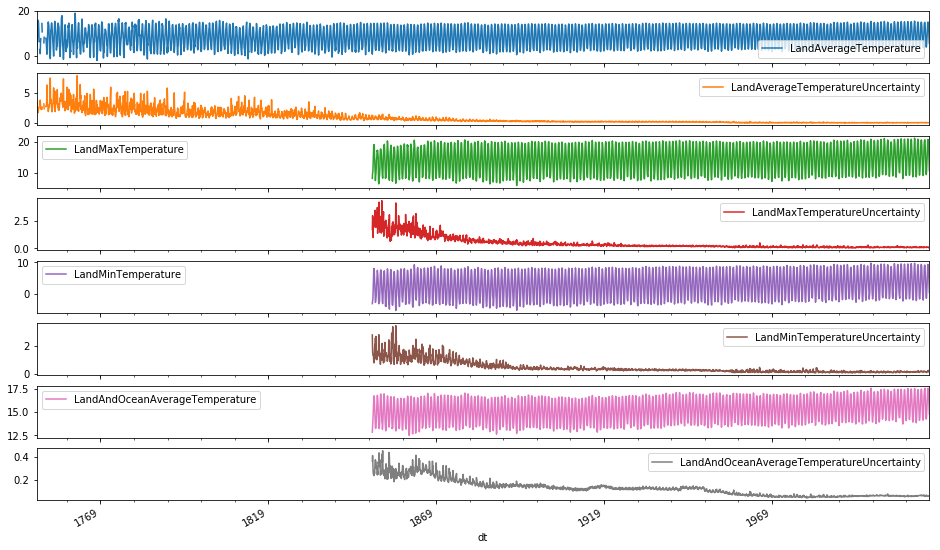

In [7]:
### make a basic plot of each column with time
df.plot(subplots=True, figsize=(16, 10))
plt.show()

In [8]:
### what insights can you find through time series analysis?
# Let's just investiage the past 50 years
df2 = df[df.index > '1969-12-31']
df2.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1970-01-01,2.836,0.084,8.288,0.117,-2.584,0.099,13.711,0.052
1970-02-01,3.735,0.082,9.543,0.108,-2.020,0.127,14.022,0.053
1970-03-01,5.272,0.114,11.066,0.180,-0.545,0.211,14.503,0.058
1970-04-01,8.603,0.066,14.383,0.179,2.739,0.113,15.440,0.051
1970-05-01,11.206,0.099,17.165,0.121,5.402,0.107,16.104,0.055


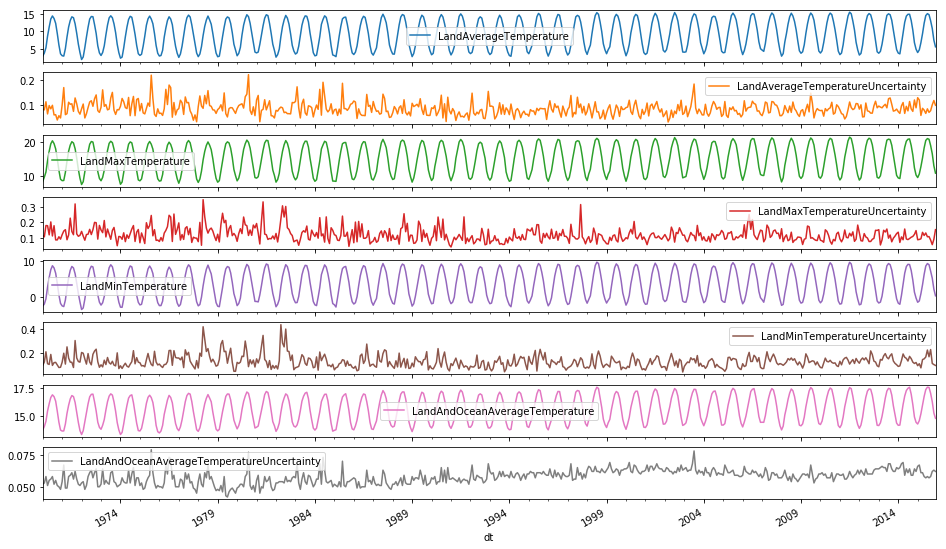

In [9]:
### Now let's plot it again
df2.plot(subplots=True, figsize=(16, 10))
plt.show()

### Okay, let's try and find some kind of correlation here


In [10]:
df2.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000
mean,9.128788,0.087043,14.823933,0.122397,3.518391,0.131946,15.575864,0.057906
std,4.151471,0.027095,4.263117,0.045466,4.032501,0.051693,1.235743,0.005561
min,1.882000,0.034000,7.392000,0.044000,-3.549000,0.045000,13.298000,0.042000
25%,4.997500,0.067750,10.636500,0.091000,-0.507500,0.095000,14.405000,0.054000
50%,9.347000,0.084000,15.127500,0.113000,3.678000,0.125000,15.590500,0.058000
75%,13.153250,0.101000,18.978500,0.145000,7.418000,0.157000,16.749000,0.062000
max,15.482000,0.221000,21.320000,0.344000,9.715000,0.433000,17.611000,0.079000


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [12]:
sd = seasonal_decompose(df2)

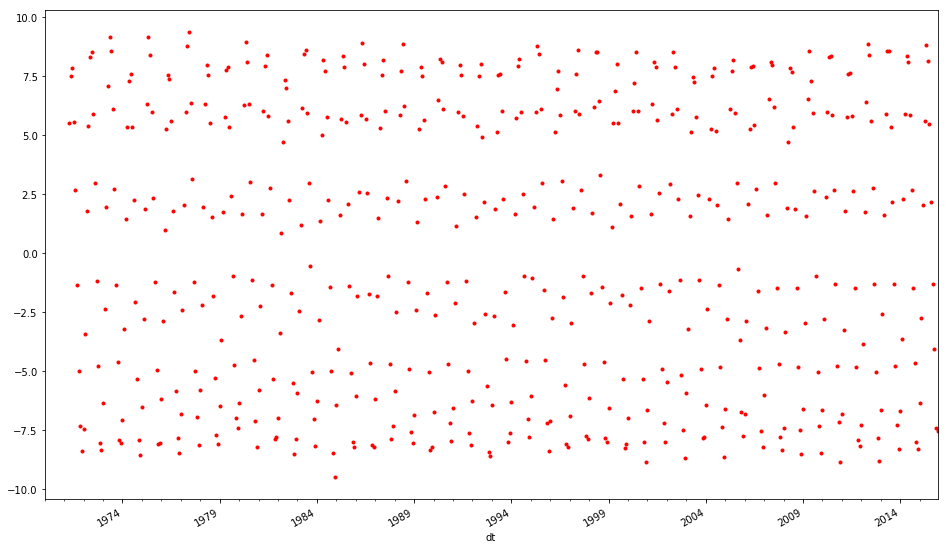

In [13]:
### is there a trend in temperature over time? 
diff_1 = df2.diff(periods=15)
diff_1['LandAverageTemperature'].plot(figsize=(16, 10), subplots=True, style='r.')
plt.show()

In [14]:
df_annual = df.LandAverageTemperature.resample('A')

In [15]:
df_annual_mean = df_annual.mean()
df_annual_mean.head()

dt
1750-12-31    8.719364
1751-12-31    7.976143
1752-12-31    5.779833
1753-12-31    8.388083
1754-12-31    8.469333
Freq: A-DEC, Name: LandAverageTemperature, dtype: float64

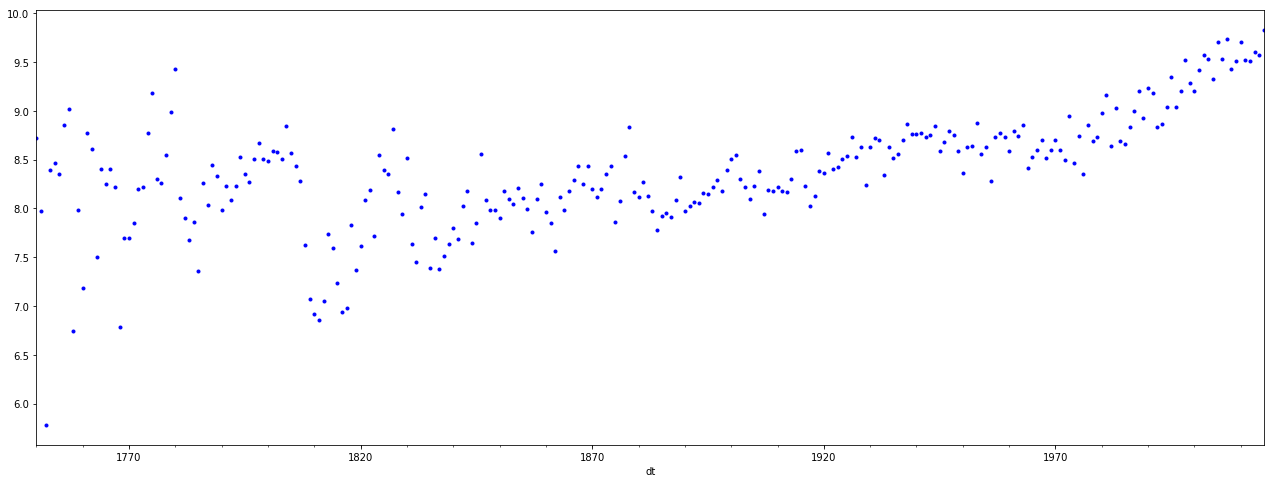

In [16]:
df_annual_mean.plot(figsize = (22,8), style = 'b.')

In [ ]:
year_matrix.head()

In [ ]:
def plot_col_heatmap(column):
    year_temps = df[column].groupby(pd.Grouper(freq='A'))
    temp_annual = pd.DataFrame()
    for yr, group in year_temps:
        temp_annual[yr] = group.values.ravel()
    year_matrix = temp_annual.T


    plt.matshow(temp_annual, cmap=plt.cm.Spectral_r, aspect='auto', interpolation=None)
    plt.yticks(ticks=range(len(temp_annual.index)), labels=temp_annual.index)
    plt.xticks(ticks=range(len(temp_annual.columns)), labels=temp_annual.columns, rotation=90)
    plt.show()

In [ ]:
drop_cols = [col for col in df2.columns if 'Uncertainty' in col]
df2.drop(drop_cols, axis=1, inplace=True)

In [ ]:
#What do we notice about the heatmap
# summer is more hot than winter

In [ ]:
for column in df2.columns:
    print(column)
    plot_col_heatmap(column)
    print("\n\n")

In [ ]:
for column in df.drop(drop_cols, axis=1).columns:
    print(column)
    plot_col_heatmap(column)
    print("\n\n")

### Assessment
- Climate change is real
- Learned to utilize the heatmap to spot trends, Spectral_r
- Workflow: putting things together from lessons

### Beginning PACF and ACF

### What is the purpose of PACF and ACF?
- ACF:  
    * Compare the correlation between 2 dates as described by the lag time
    * Telling us how much the later data depends on earlier data

In [18]:
df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


### ACF and PACF of DATA

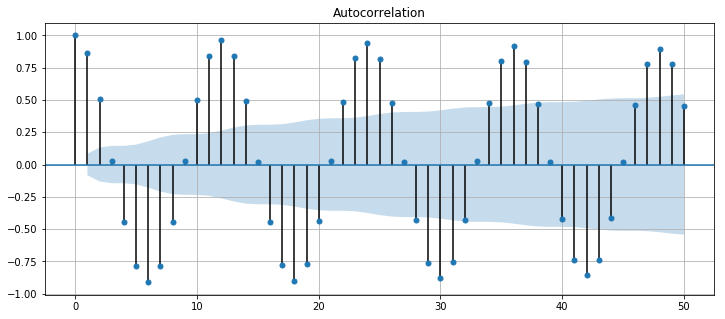

In [74]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(df2['LandAndOceanAverageTemperature'],ax=ax, lags=50)
plt.grid()

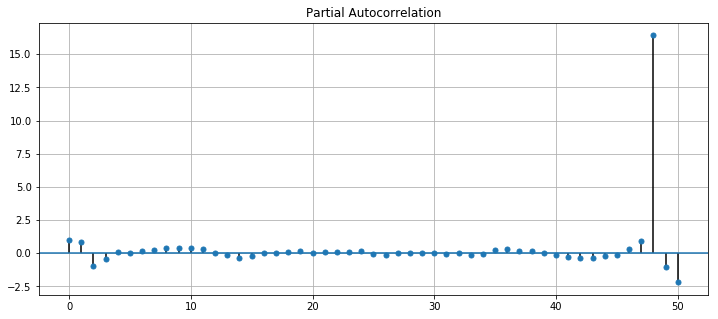

In [76]:
fig, ax = plt.subplots(figsize=(12,5))
plot_pacf(df2['LandAndOceanAverageTemperature'],ax=ax, lags=50)
plt.grid()

In [73]:
df2.ix[48, :]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


LandAverageTemperature                        2.261
LandAverageTemperatureUncertainty             0.096
LandMaxTemperature                            7.464
LandMaxTemperatureUncertainty                 0.109
LandMinTemperature                           -2.894
LandMinTemperatureUncertainty                 0.096
LandAndOceanAverageTemperature               13.300
LandAndOceanAverageTemperatureUncertainty     0.052
Name: 1974-01-01 00:00:00, dtype: float64

### Let's look at differences now of 1 and 12

In [78]:
df2_diff12 = df2.diff(periods=12)
df2_diff1 = df2.diff(periods=1)
df2.head(2)

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
dt,,,,,,,,
1970-01-01,2.836,0.084,8.288,0.117,-2.584,0.099,13.711,0.052
1970-02-01,3.735,0.082,9.543,0.108,-2.020,0.127,14.022,0.053


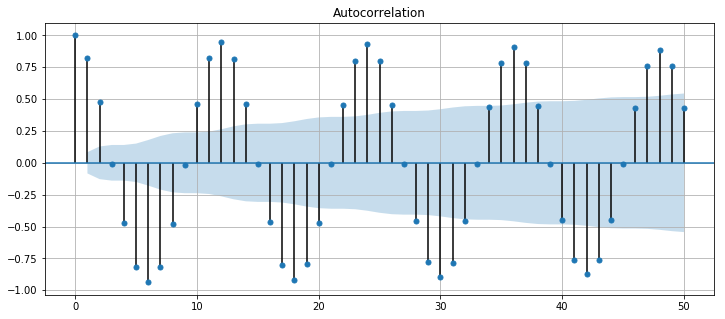

In [79]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(df2_diff1['LandAndOceanAverageTemperature'].dropna(),ax=ax, lags=50)
plt.grid()

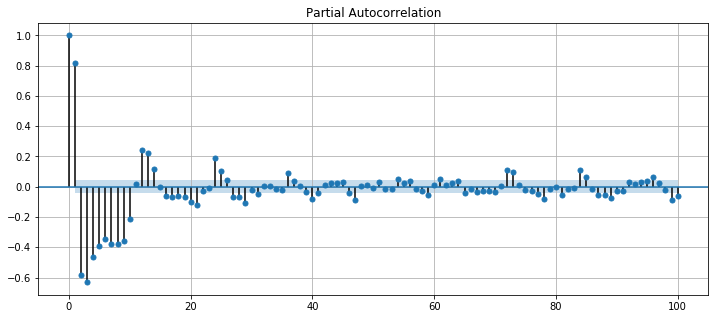

In [81]:
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(df_diff1['LandAndOceanAverageTemperature'].dropna(),ax=ax, lags=100);
plt.grid()

$$ ARMA = F_1(y_{t-i}) + F_2(\epsilon_i) $$

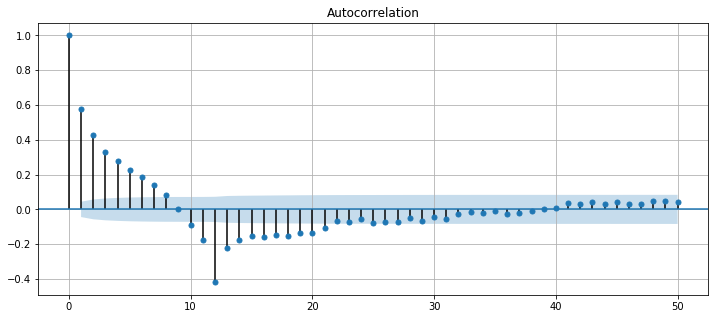

In [84]:
fig, ax = plt.subplots(figsize=(12,5))
plot_acf(df_diff12['LandAndOceanAverageTemperature'].dropna(),ax=ax, lags=50)
plt.grid()

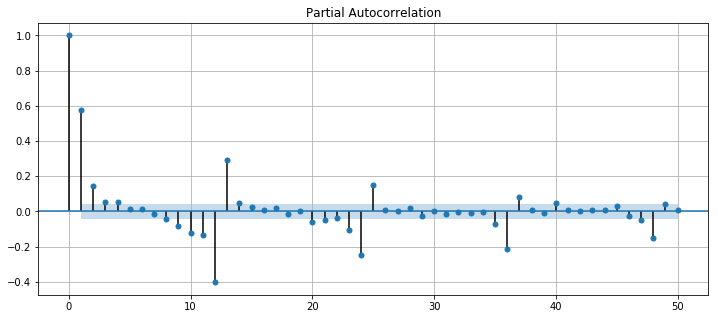

In [85]:
fig, ax = plt.subplots(figsize=(12, 5))
plot_pacf(df_diff12['LandAndOceanAverageTemperature'].dropna(),ax=ax, lags=50)
plt.grid()

### Let's look at diffs of ...

30


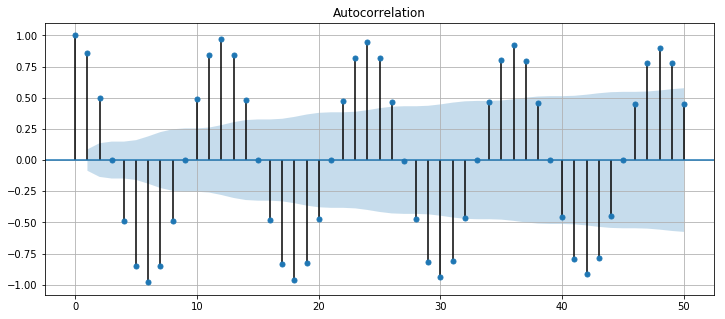

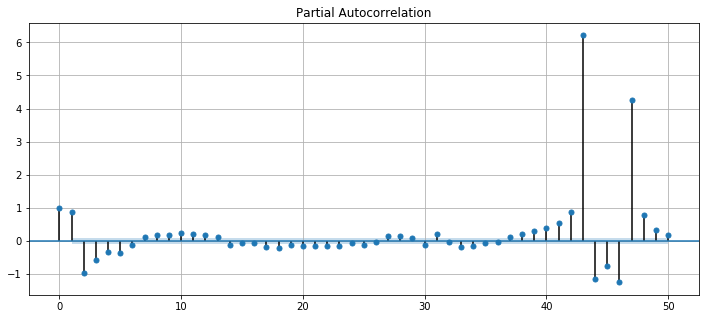

31


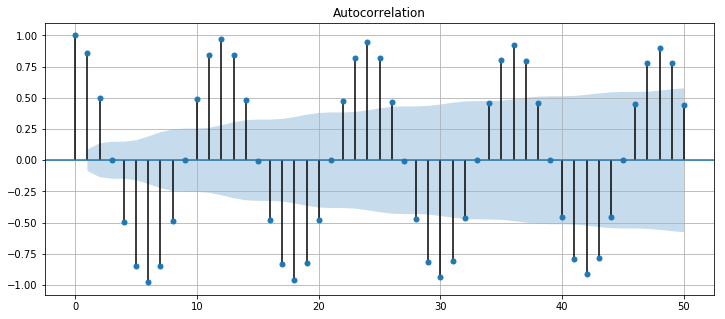

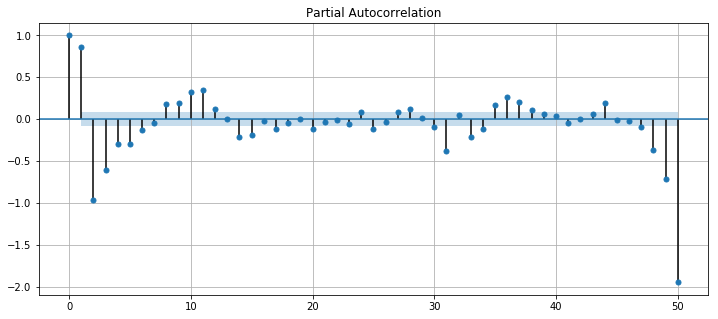

32


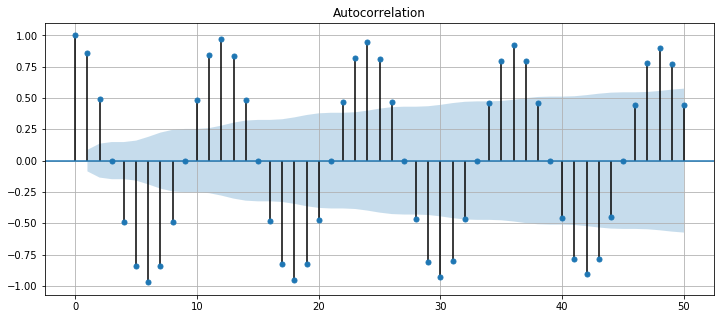

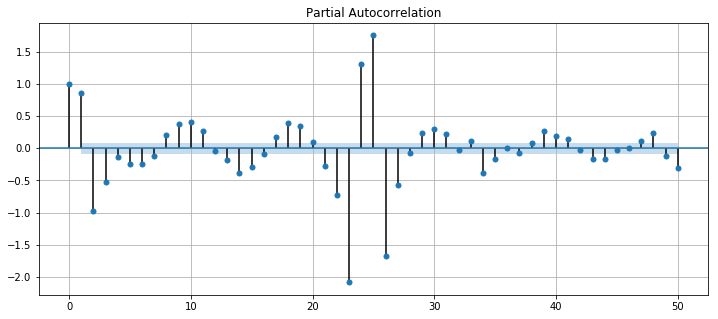

33


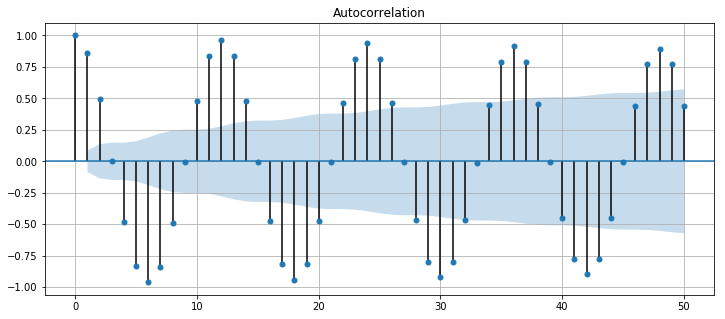

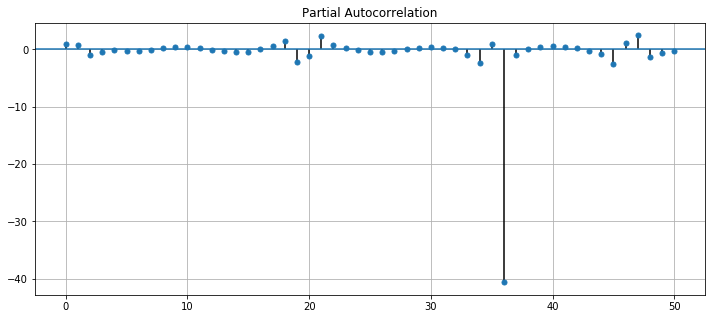

34


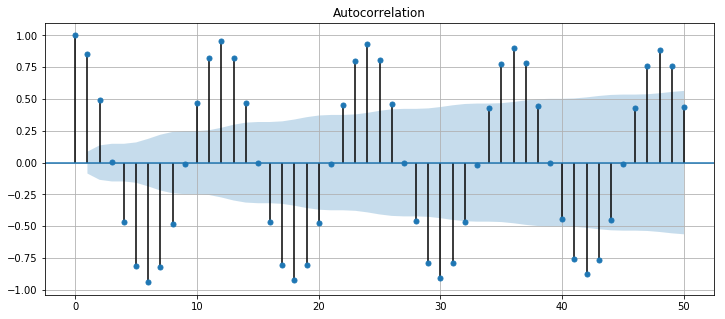

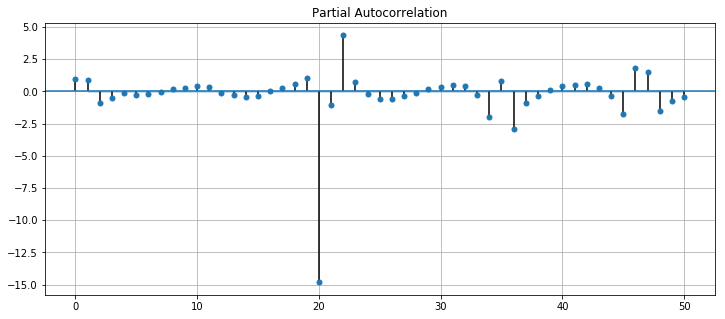

35


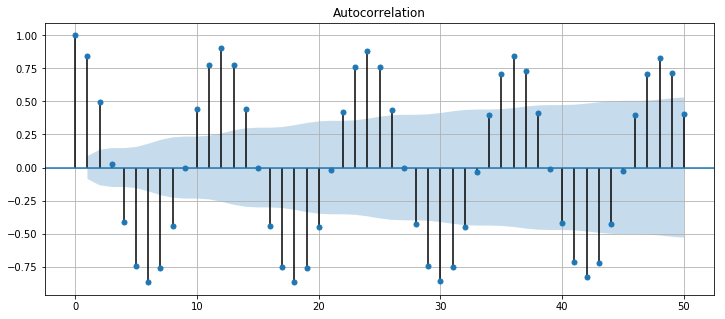

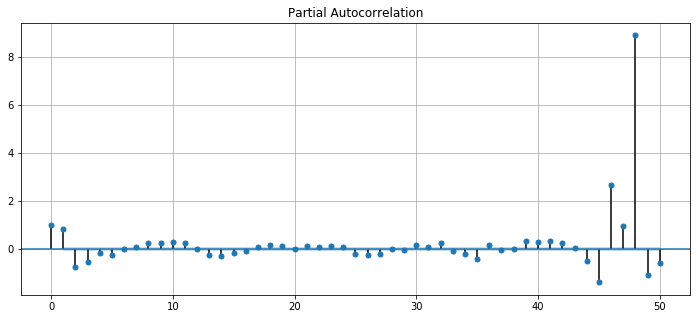

36


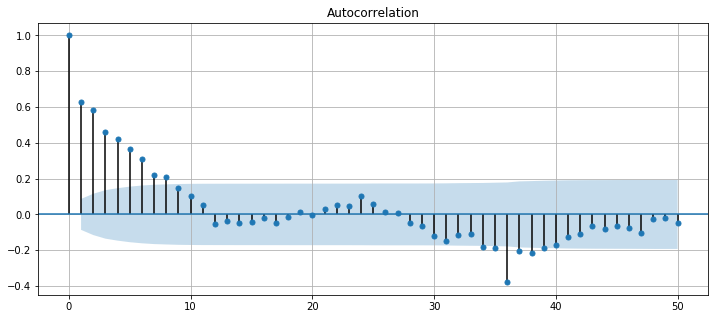

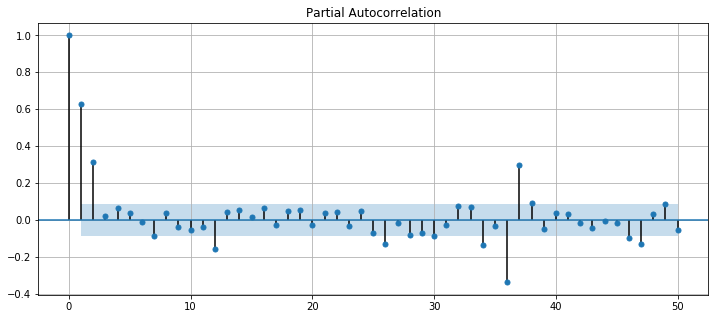

37


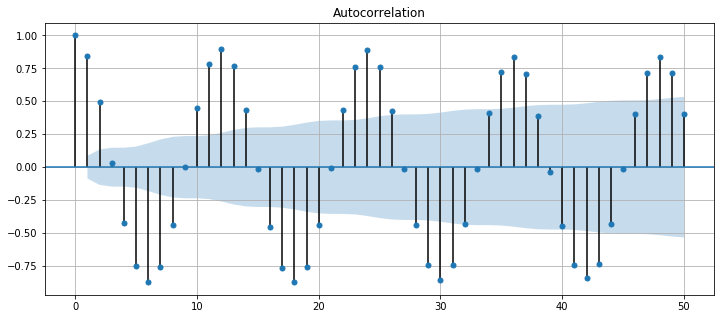

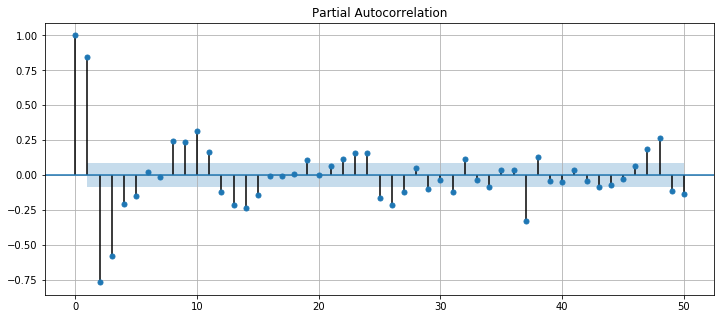

38


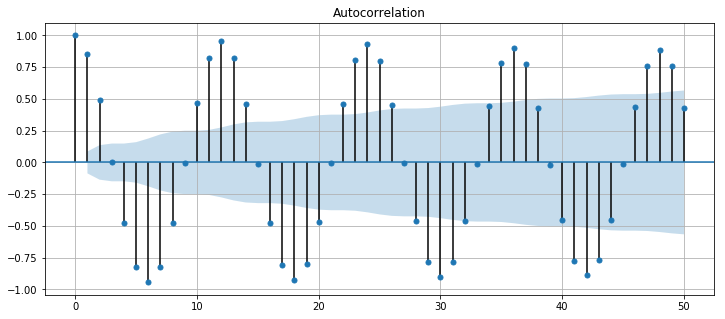

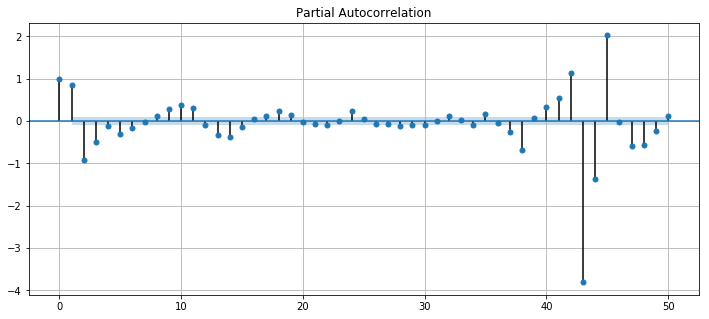

39


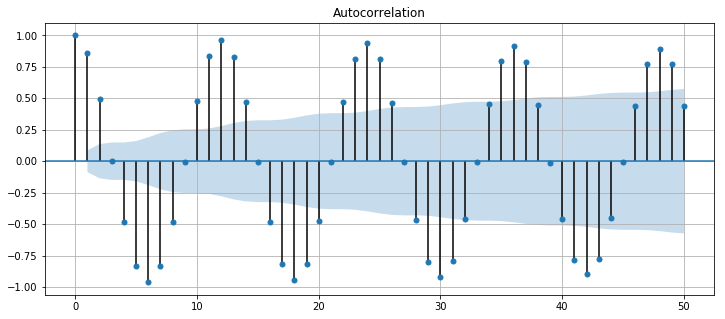

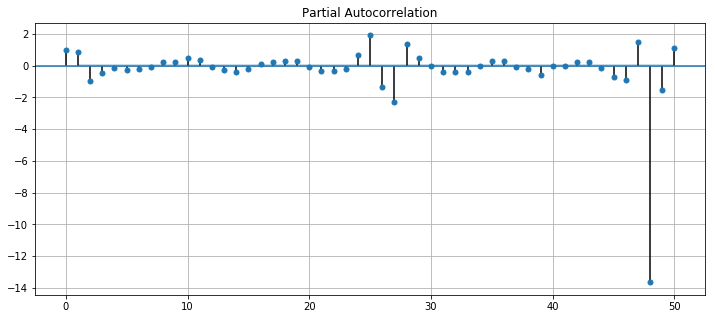

40


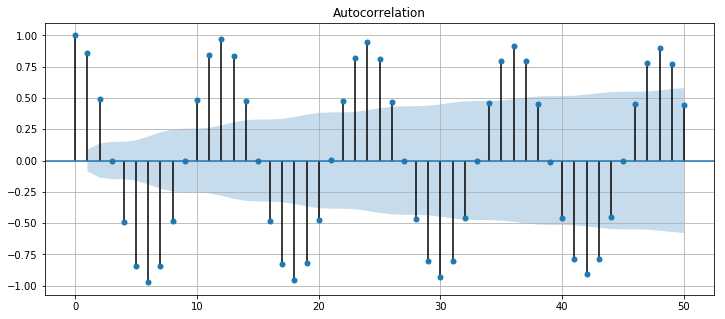

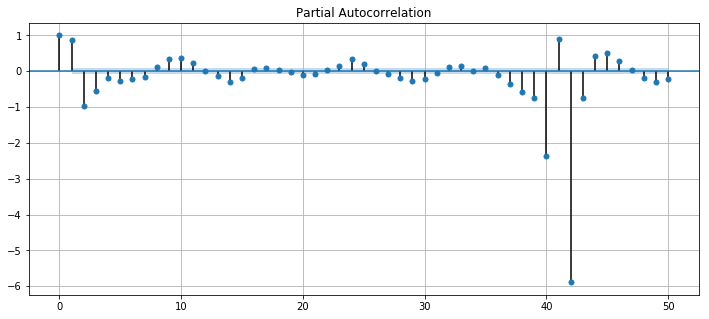

41


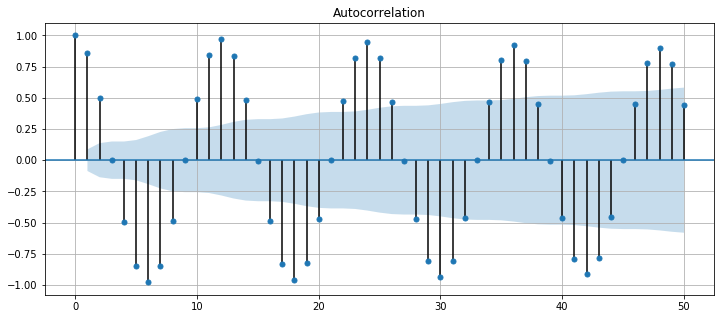

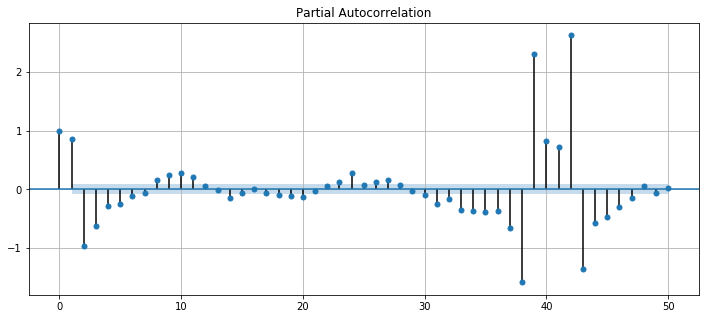

42


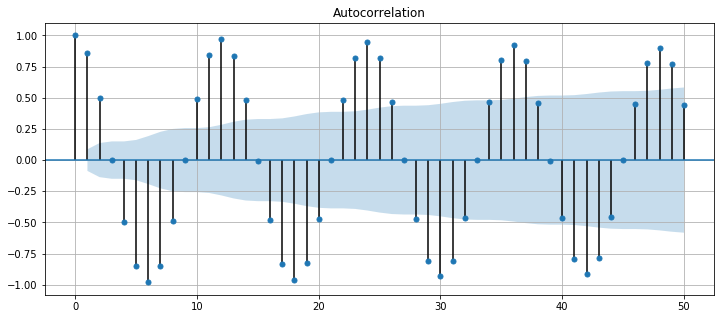

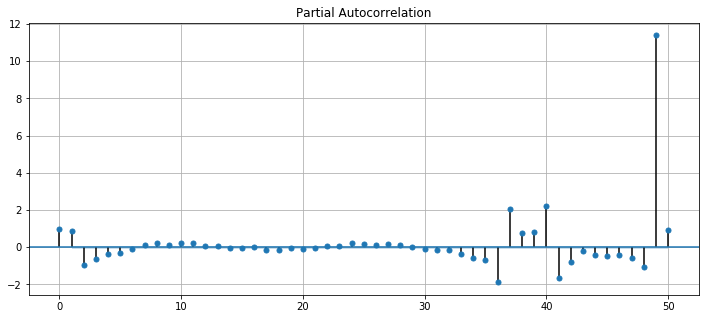

43


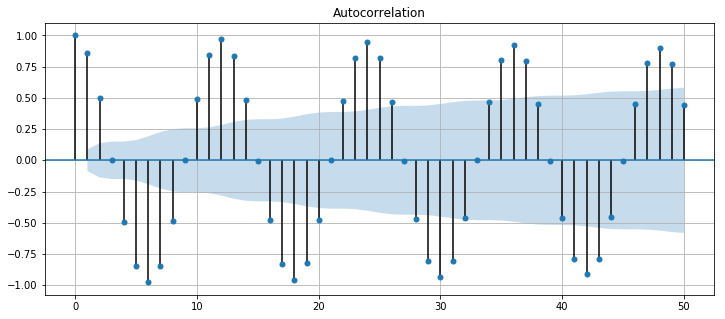

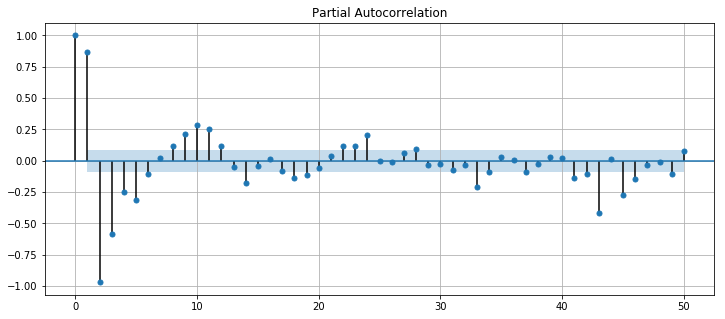

44


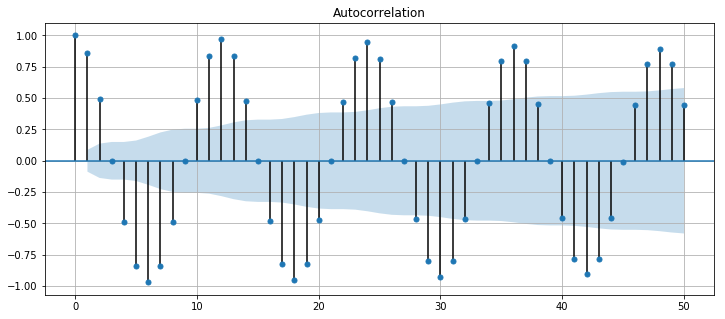

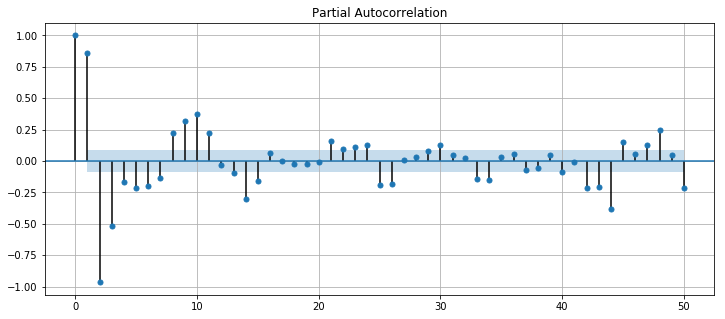

45


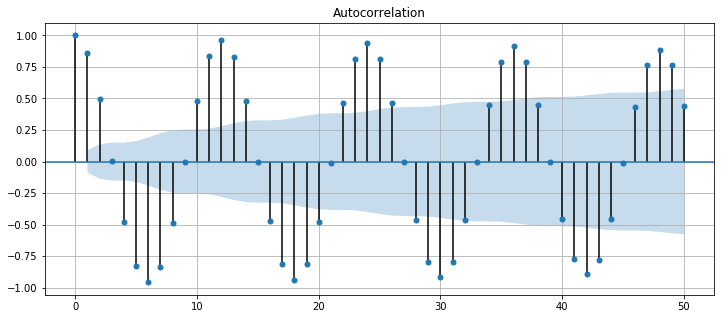

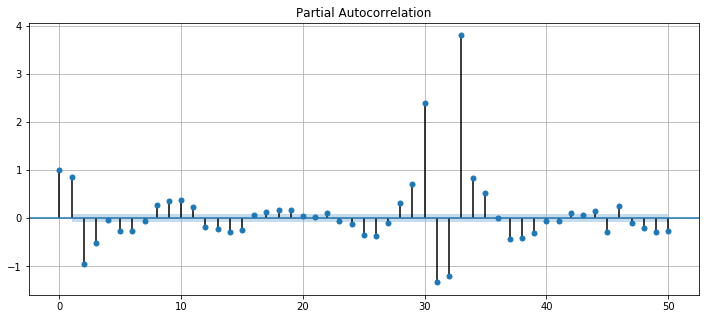

46


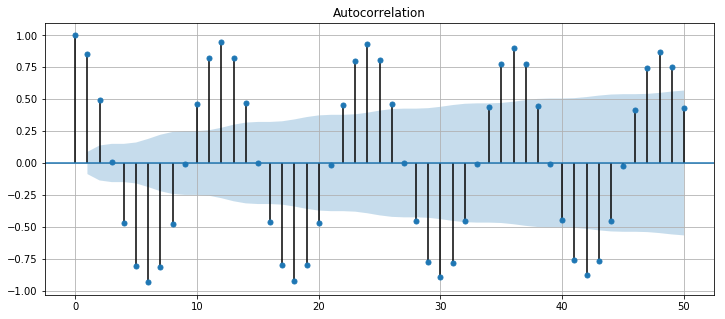

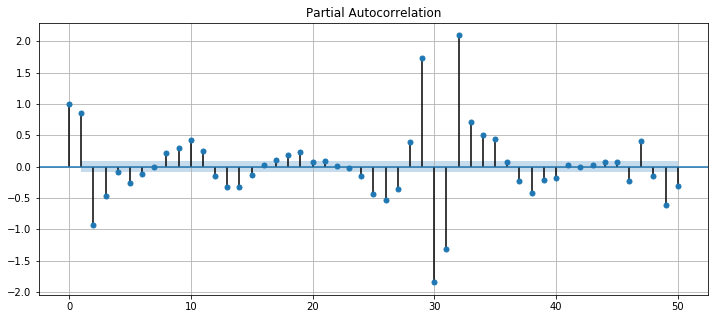

47


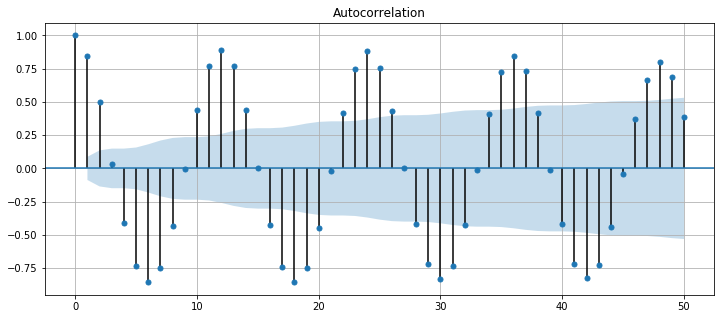

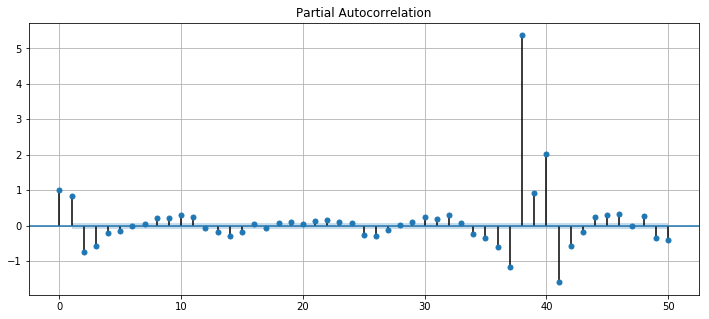

48


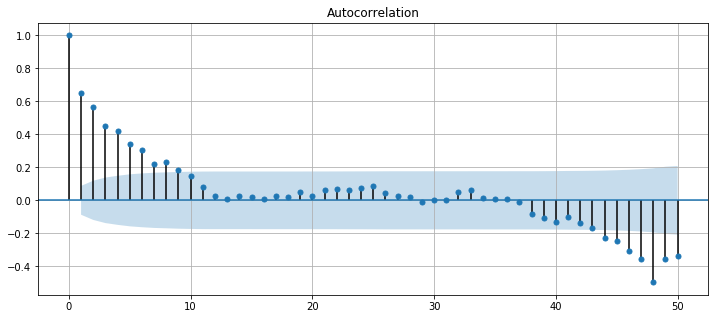

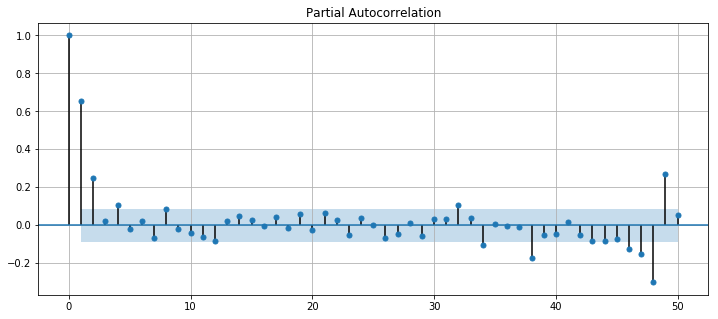

49


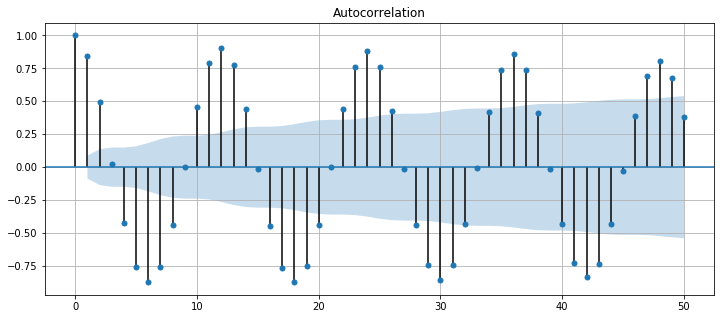

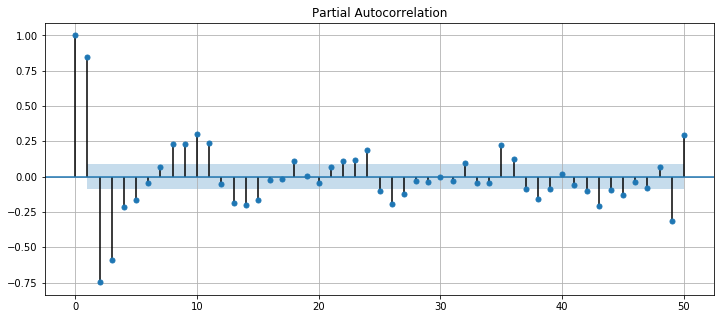

50


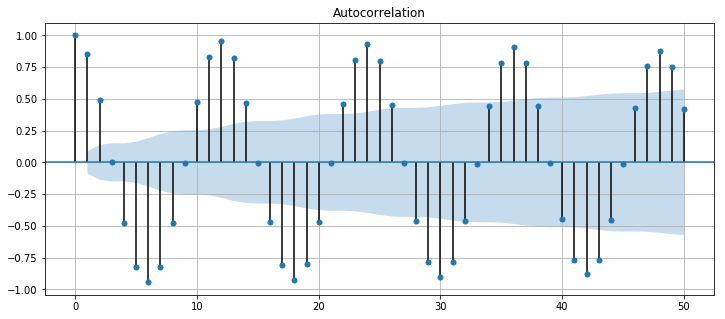

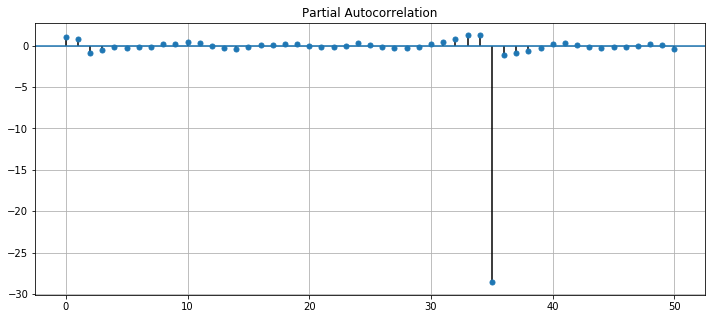

51


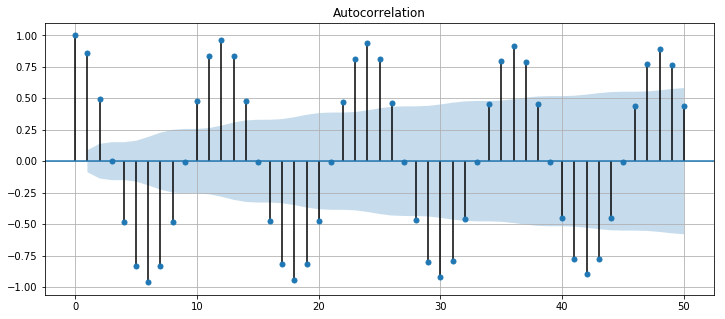

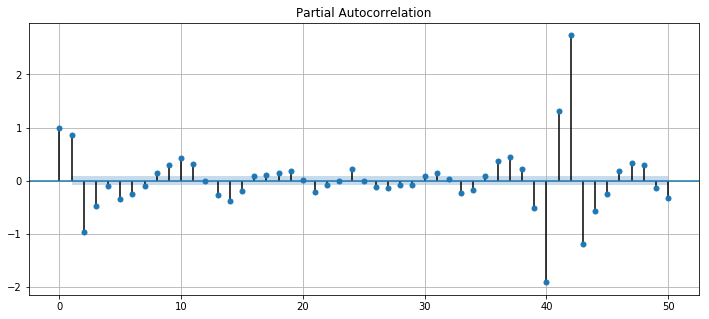

52


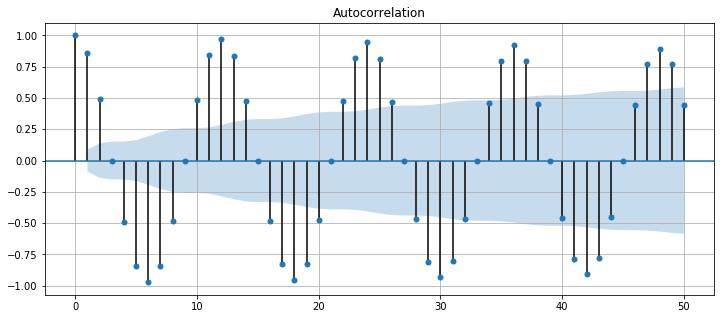

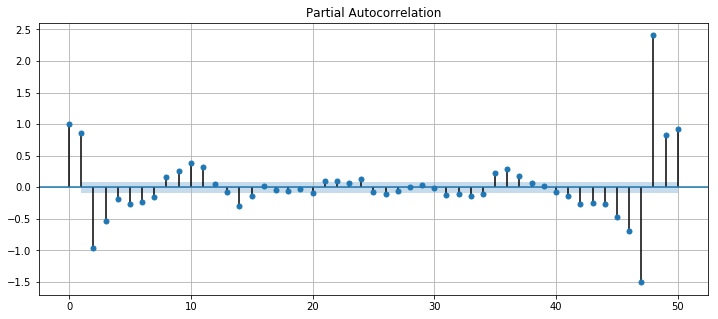

53


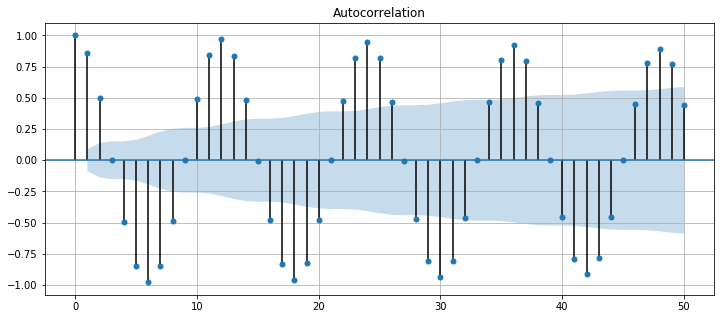

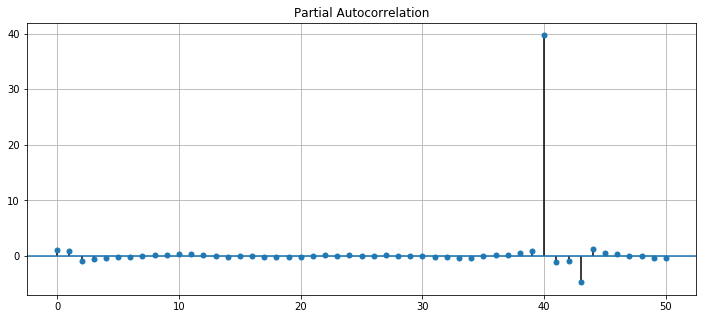

54


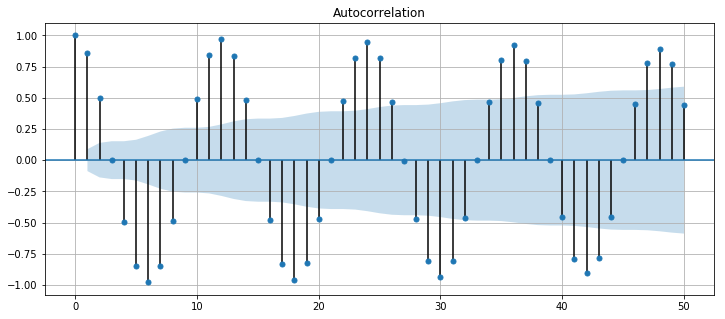

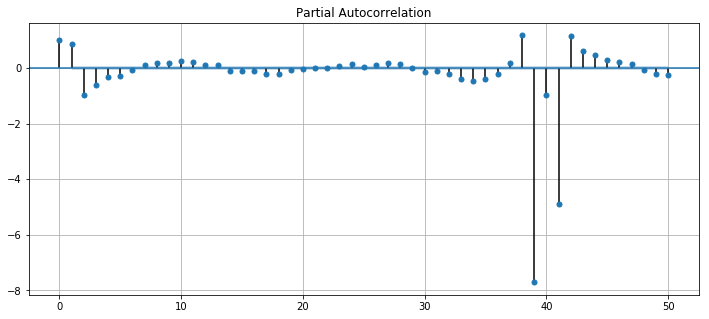

55


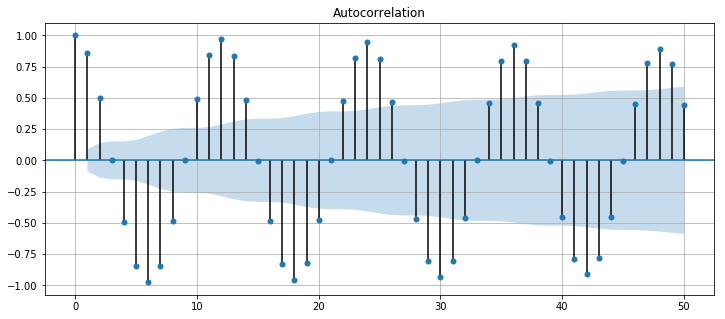

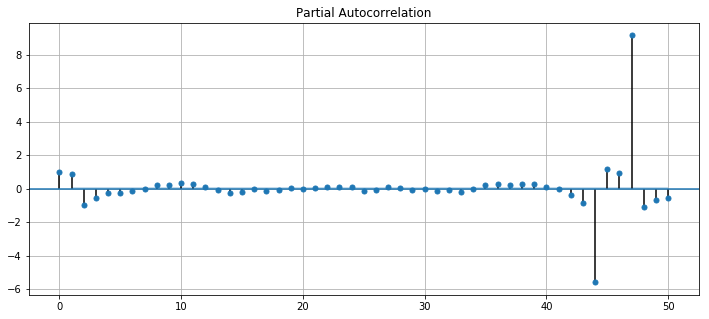

56


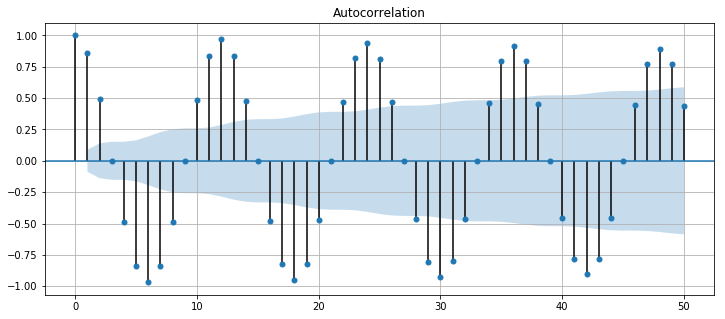

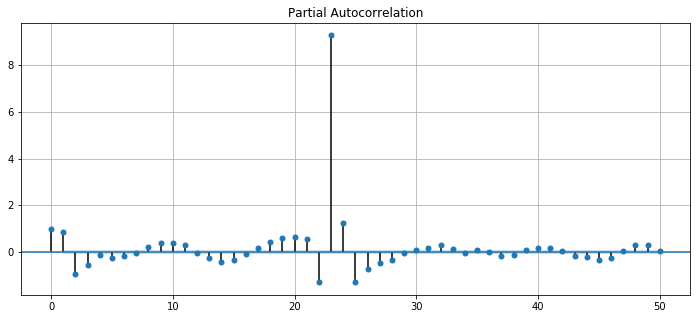

57


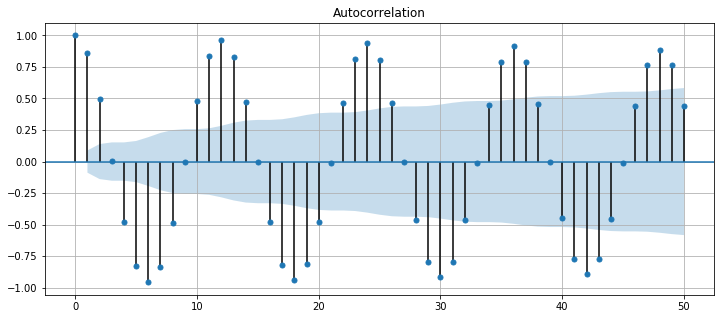

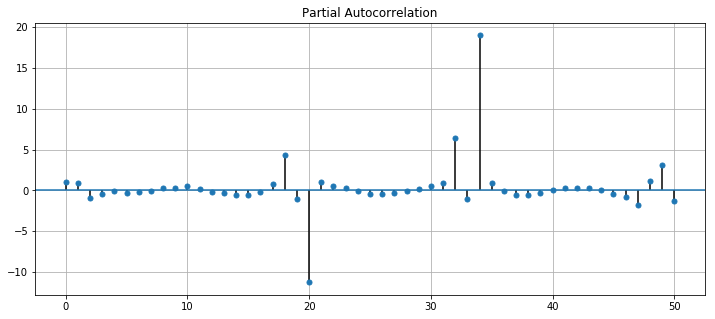

58


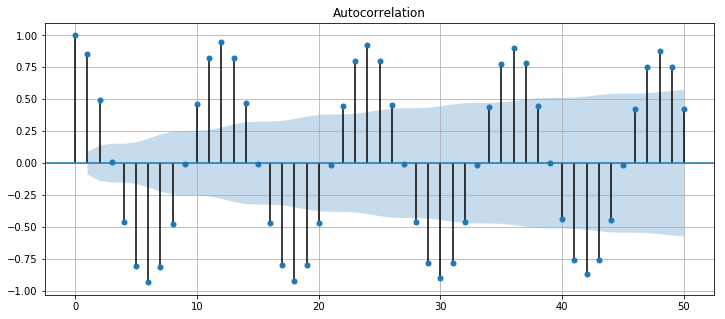

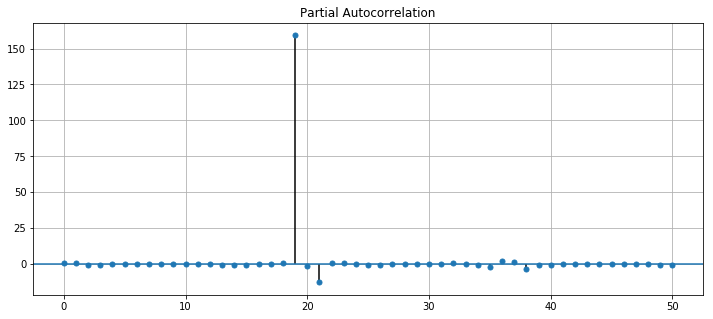

59


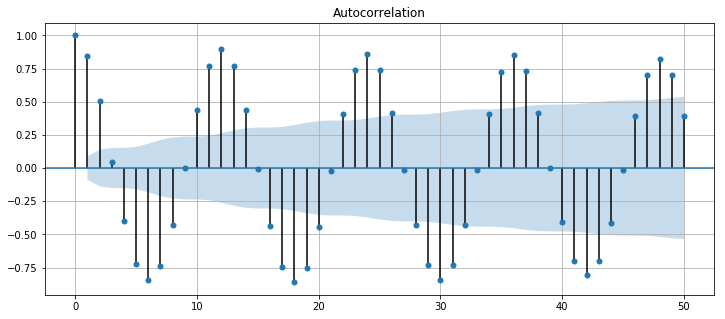

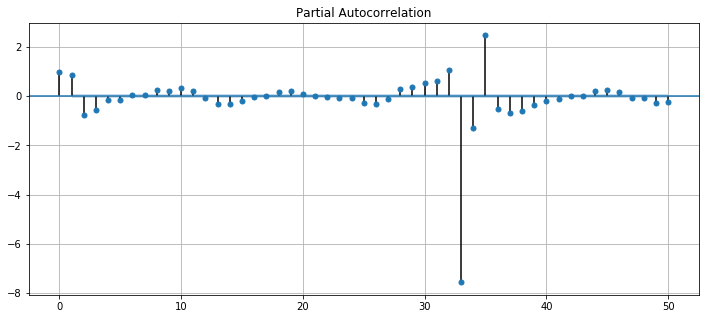

60


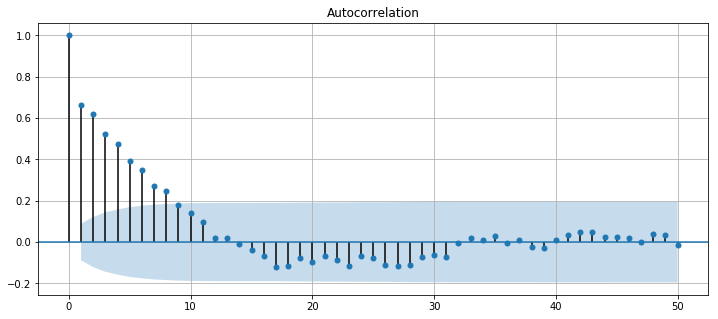

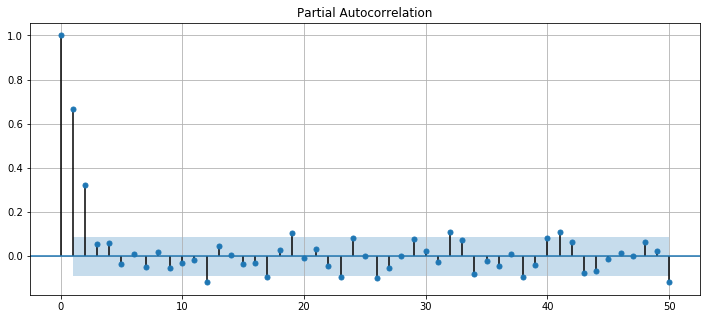

61


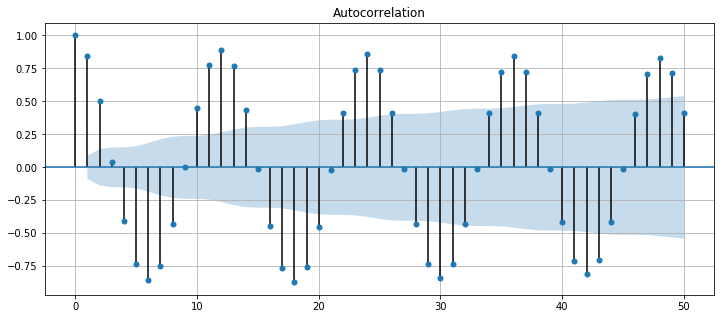

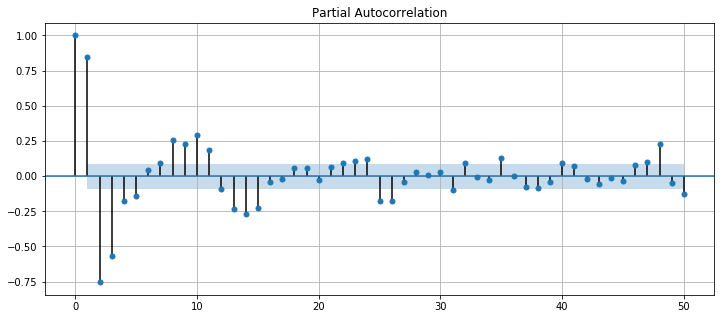

62


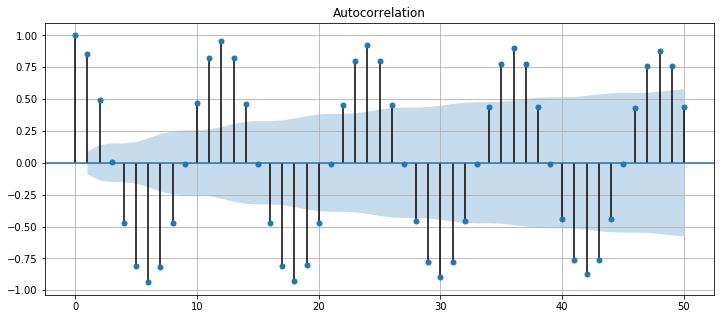

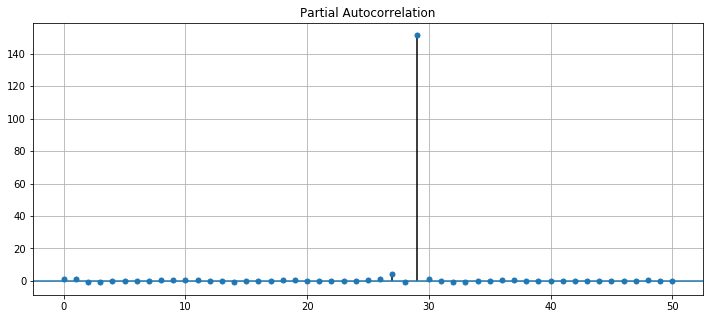

63


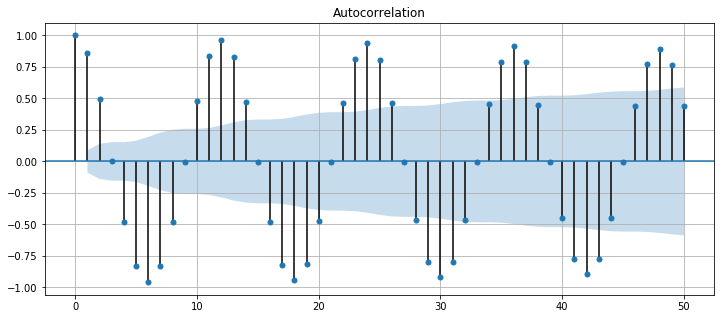

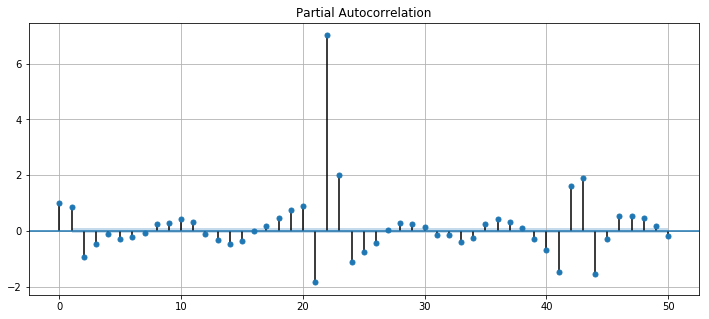

64


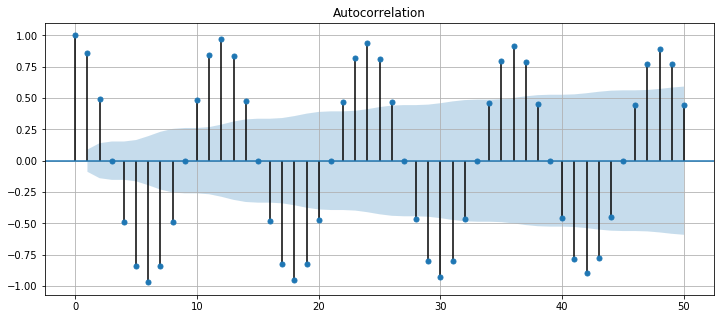

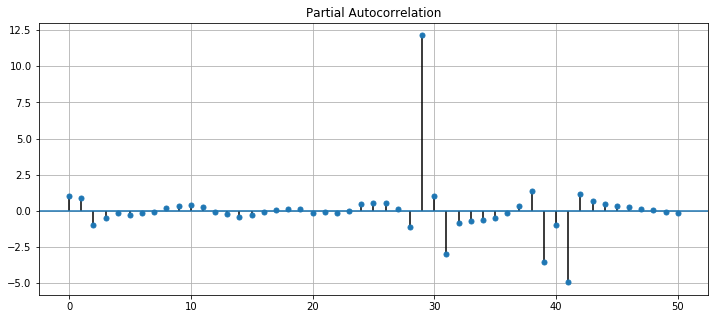

65


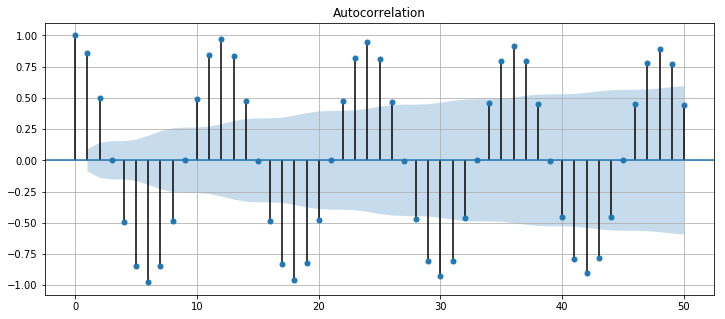

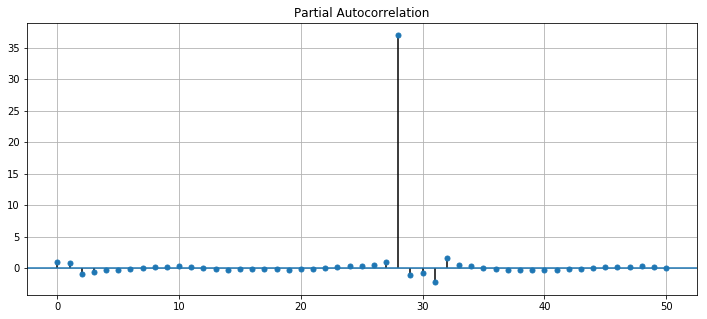

66


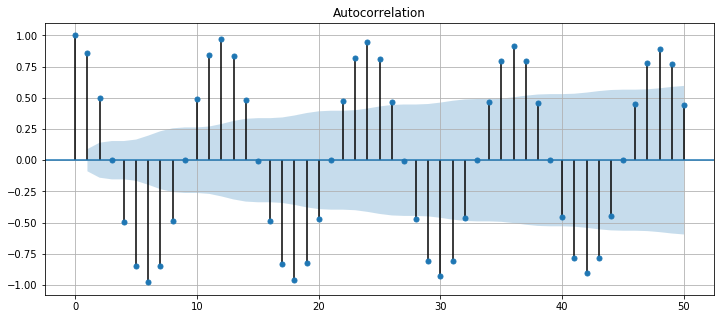

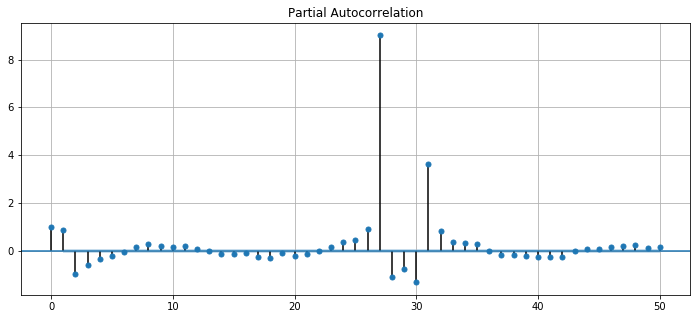

67


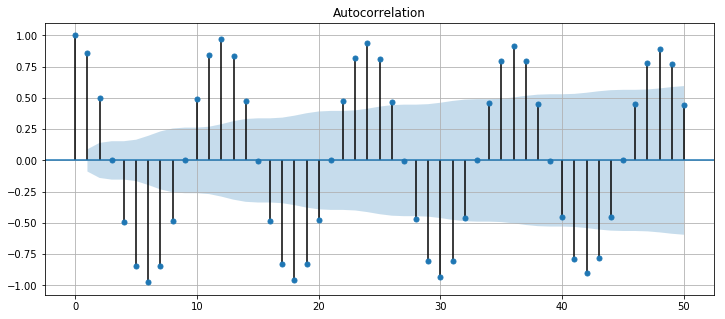

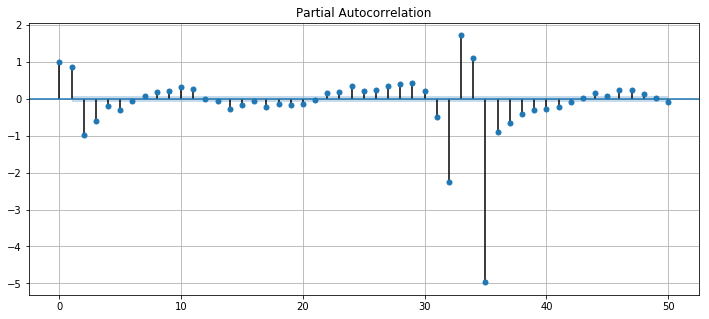

68


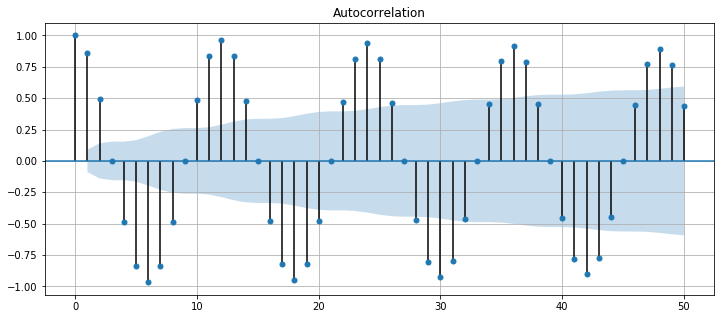

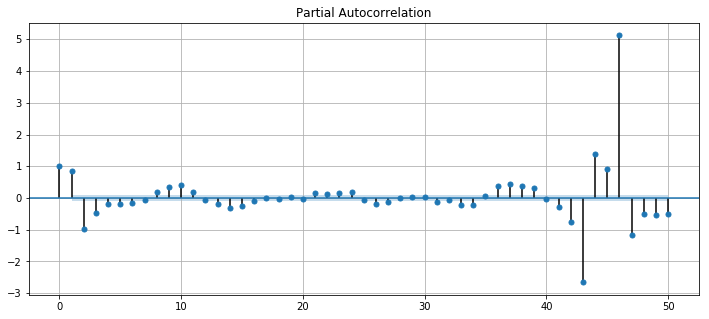

69


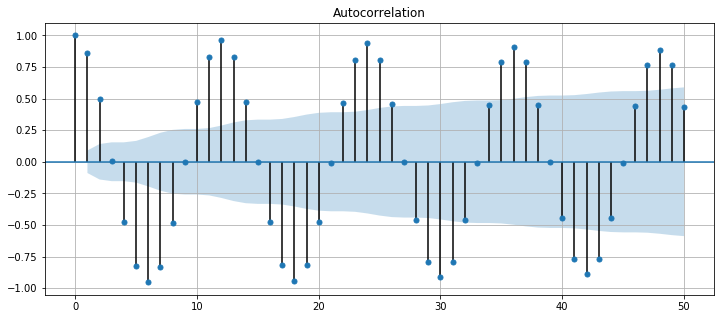

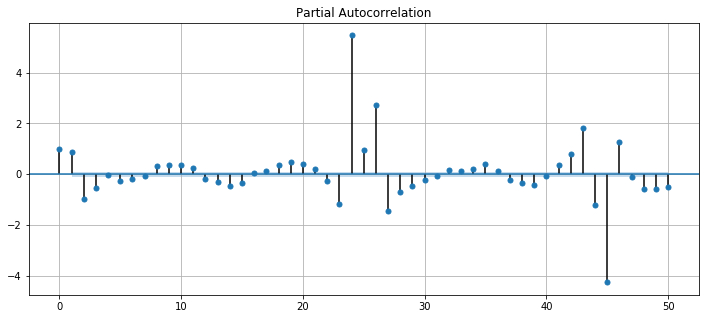

70


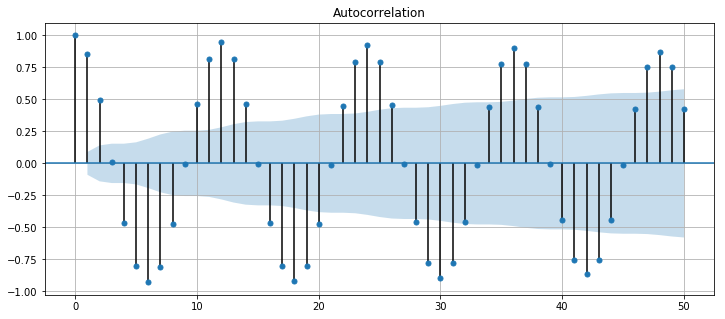

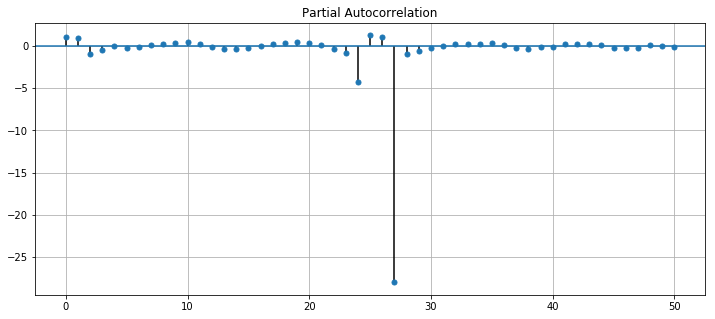

71


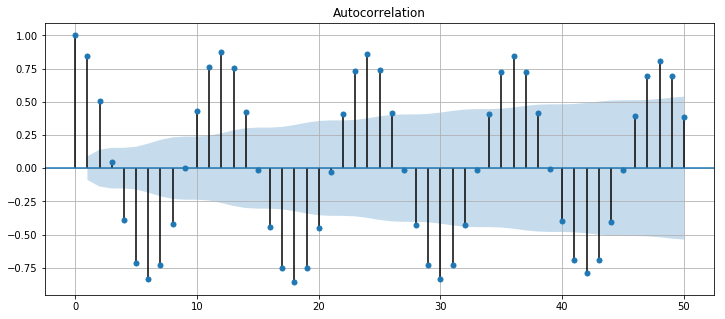

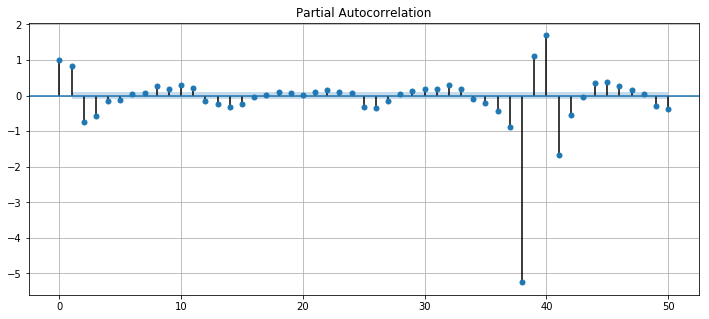

72


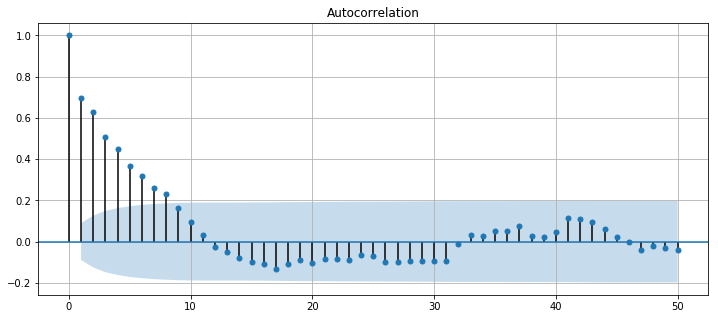

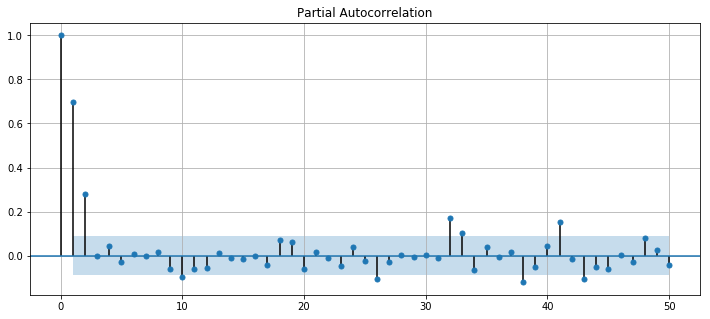

73


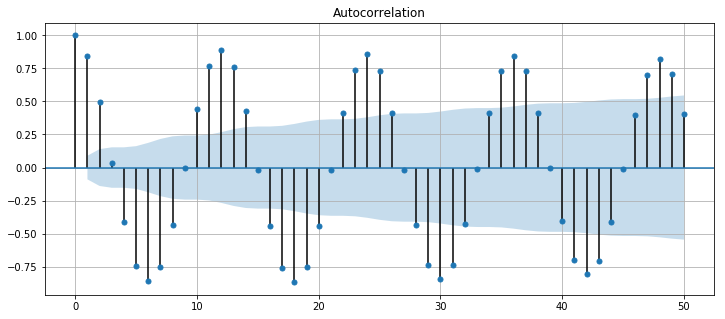

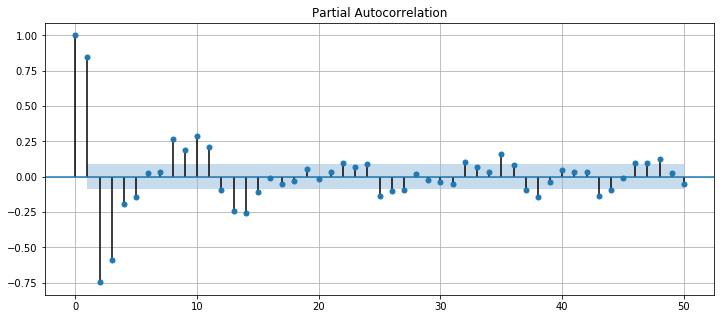

74


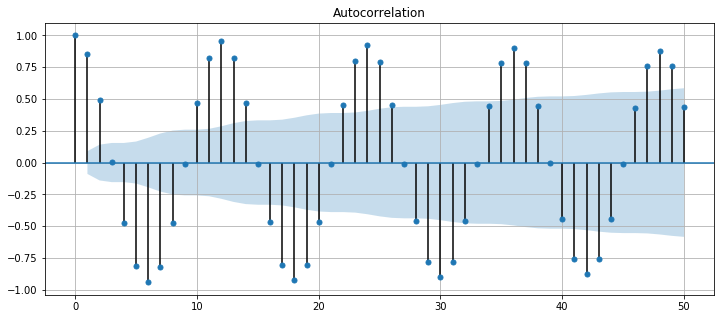

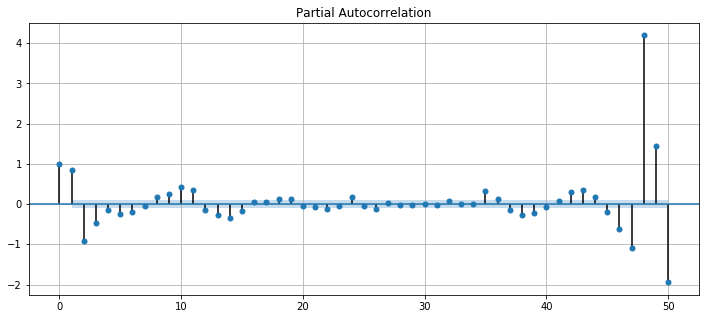

75


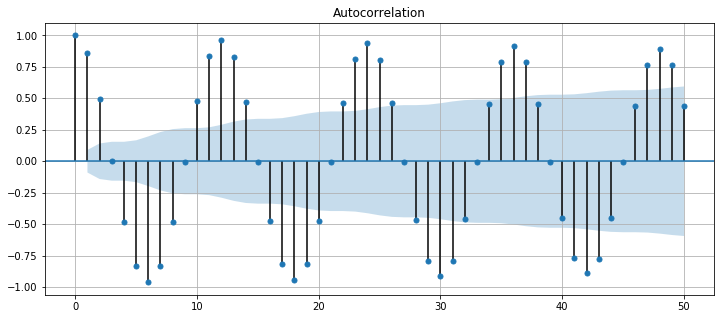

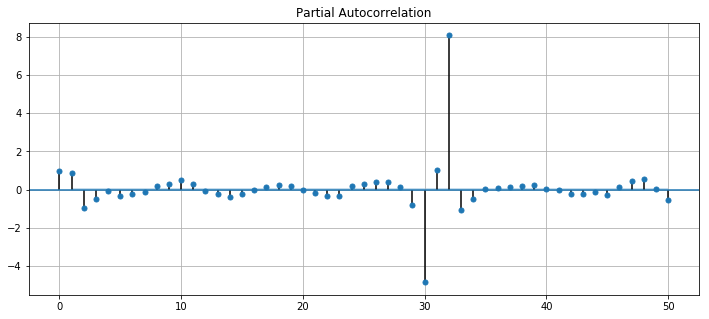

76


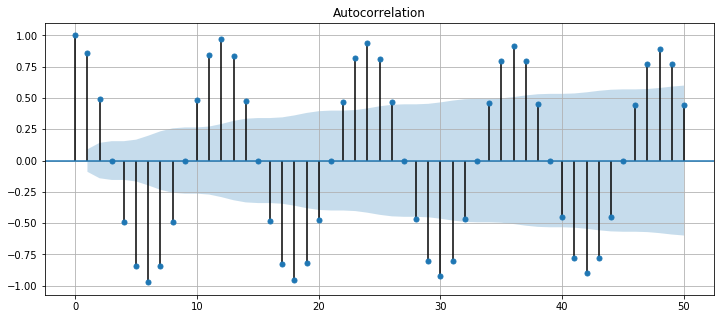

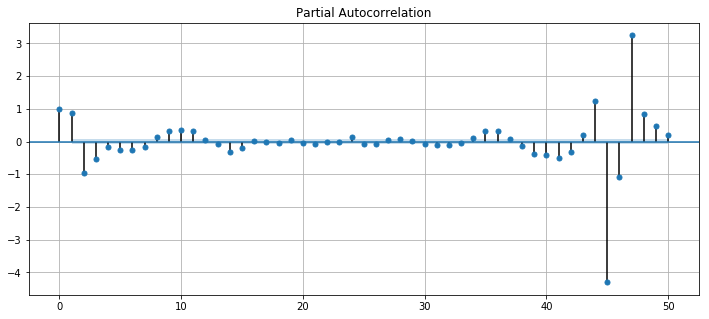

77


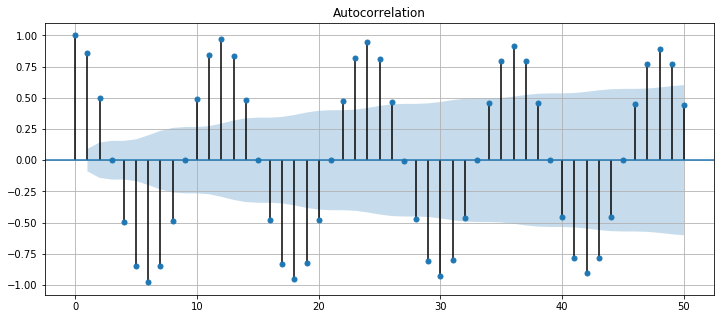

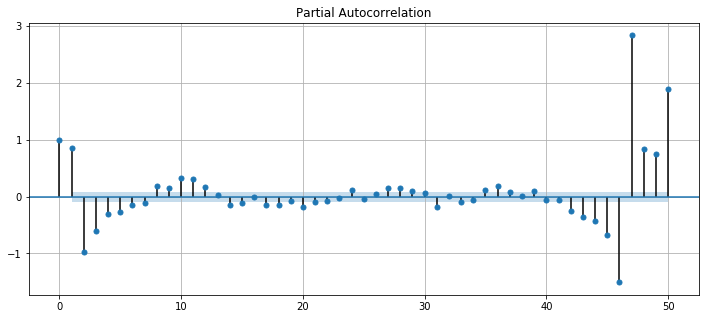

78


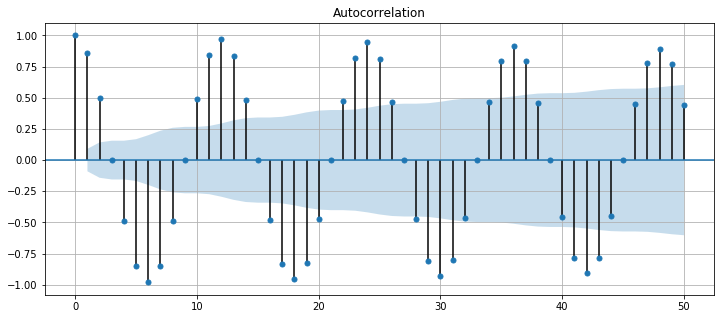

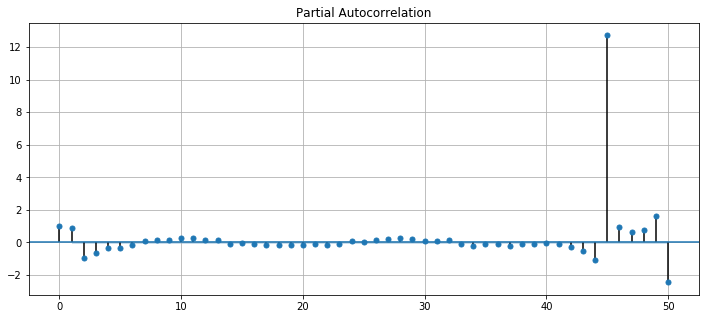

79


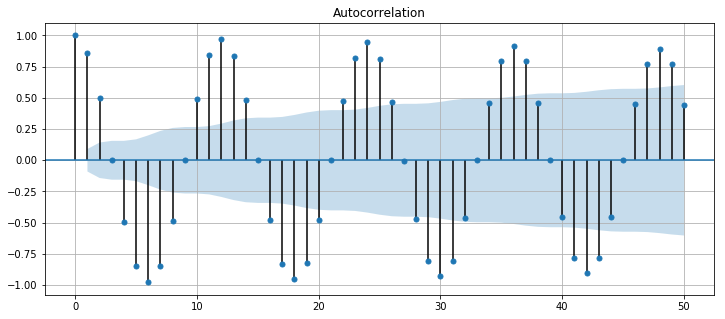

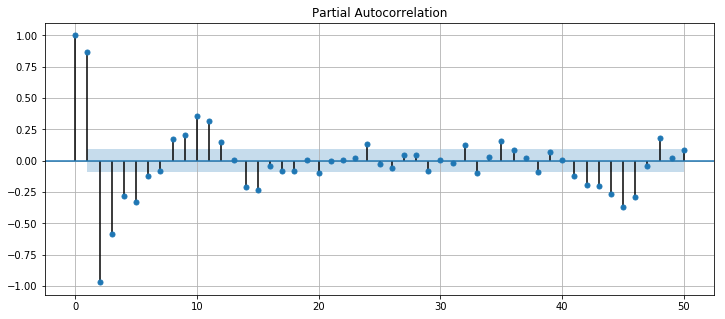

80


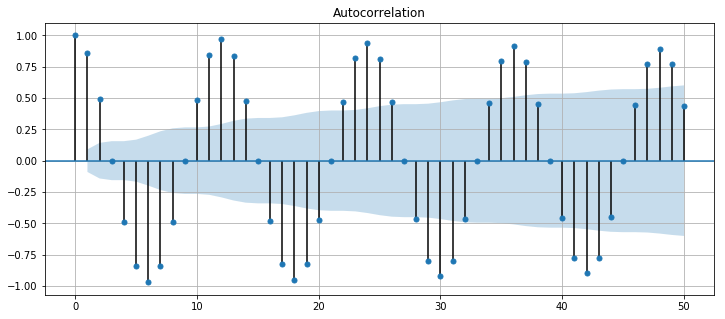

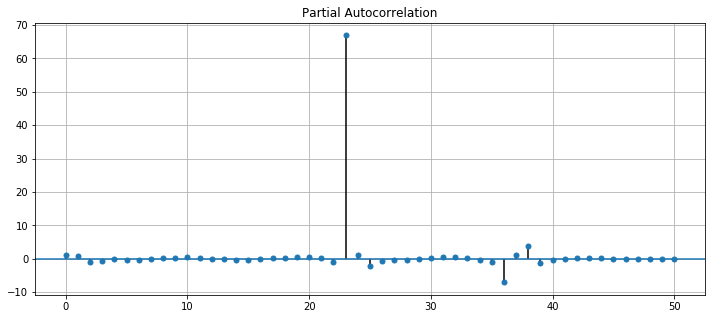

81


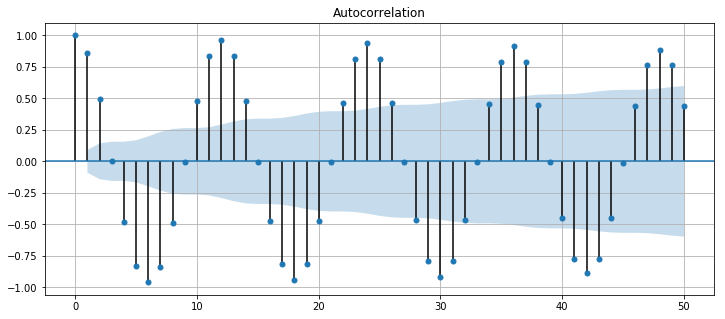

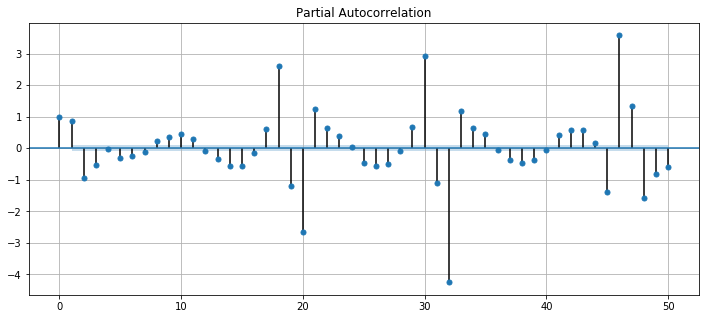

82


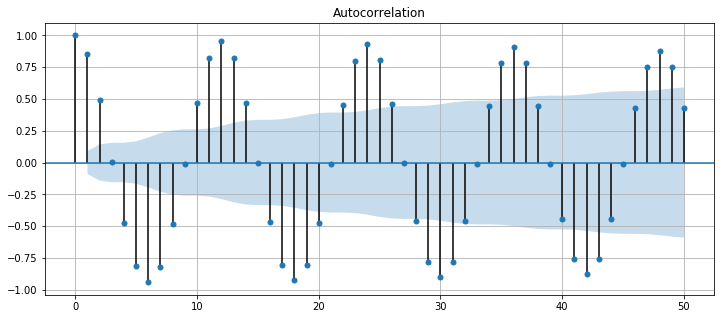

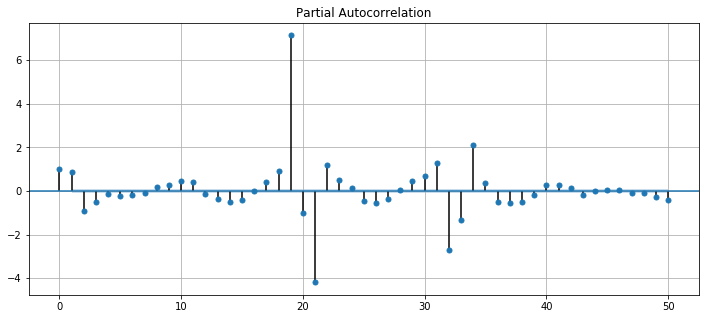

83


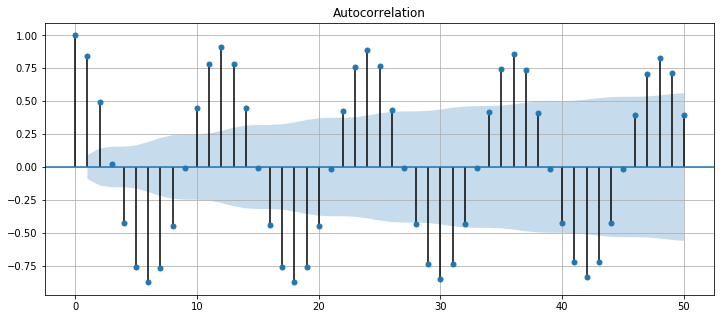

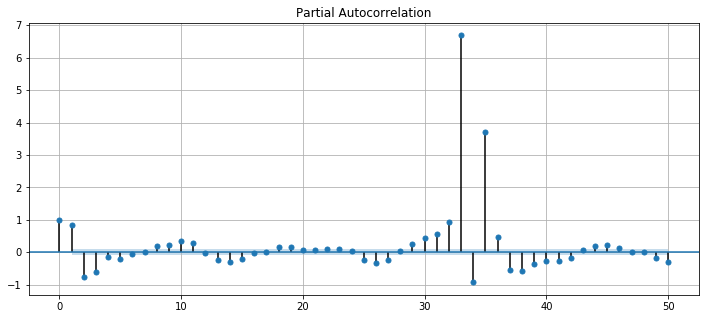

84


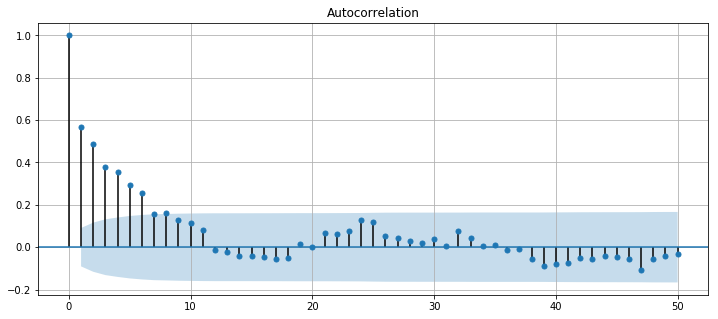

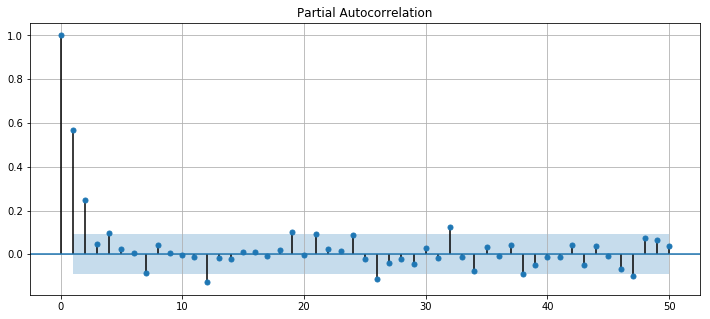

85


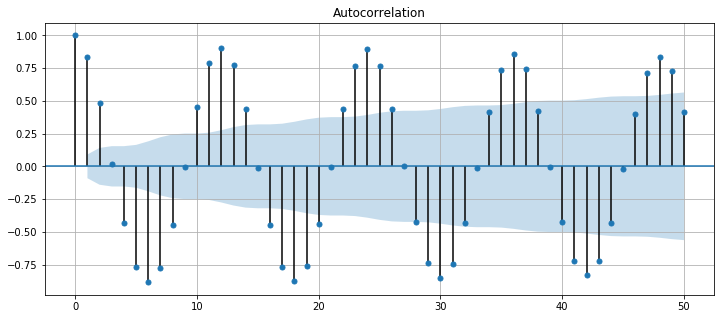

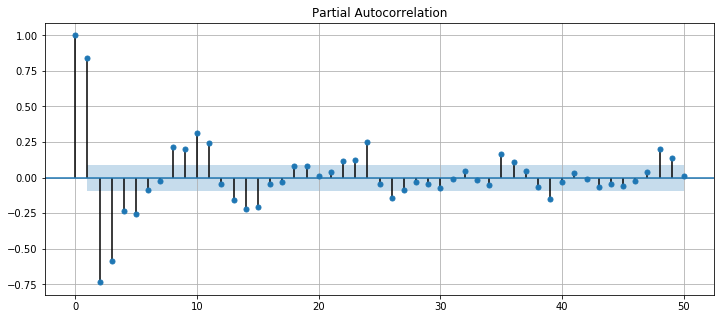

86


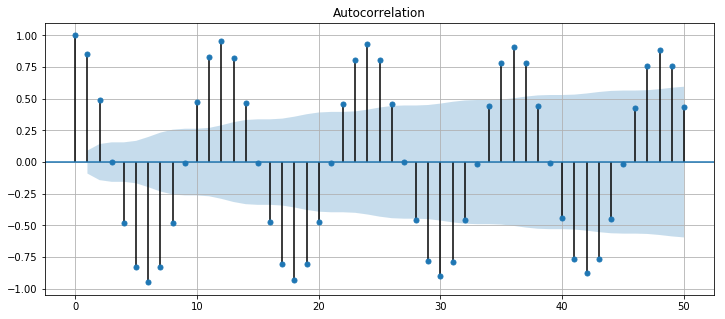

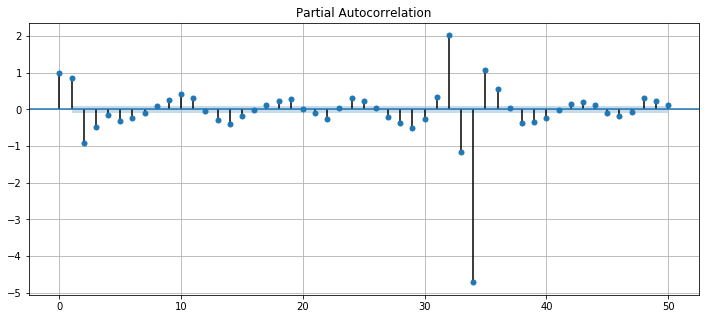

87


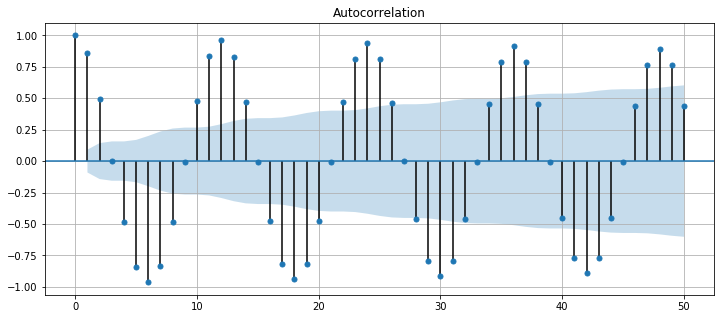

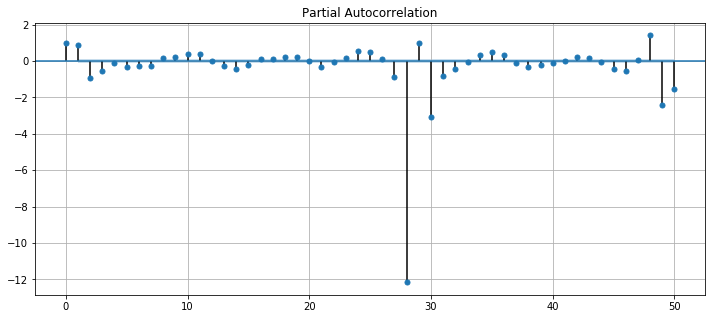

88


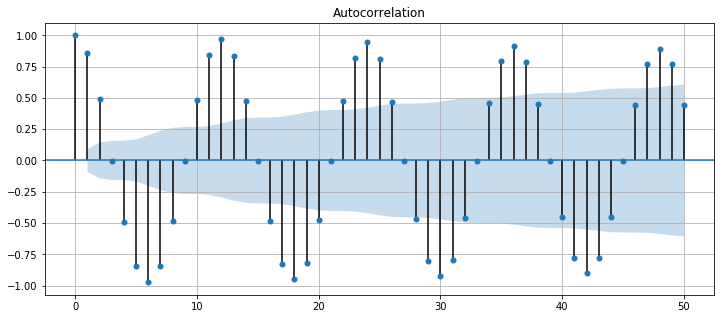

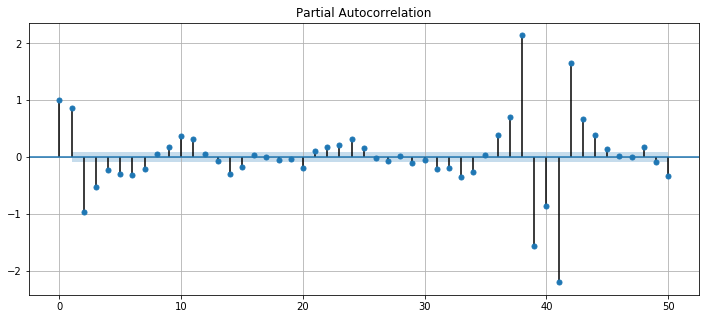

89


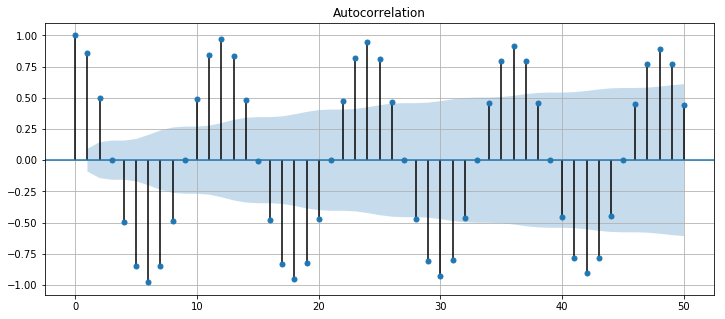

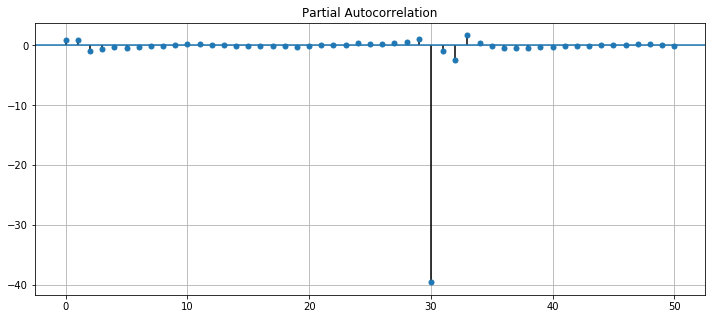

90


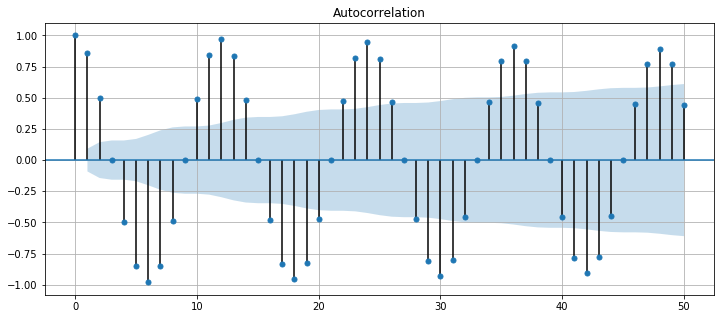

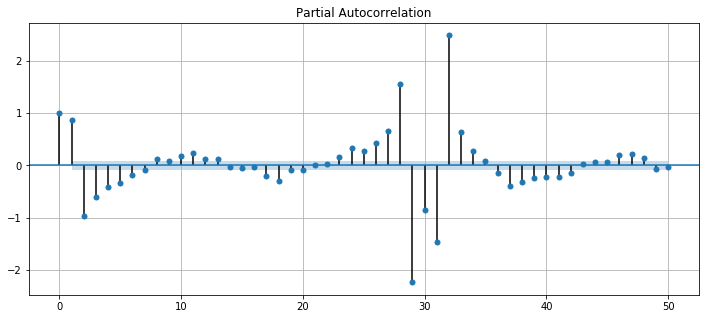

91


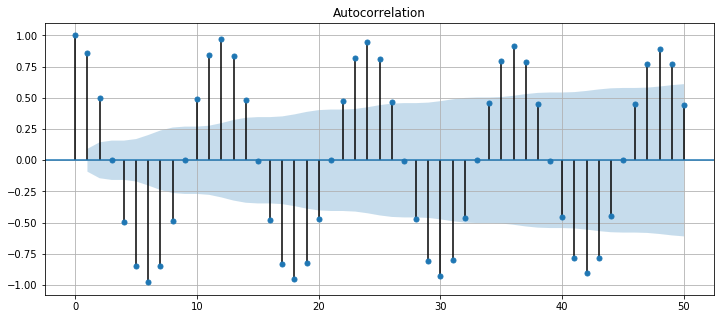

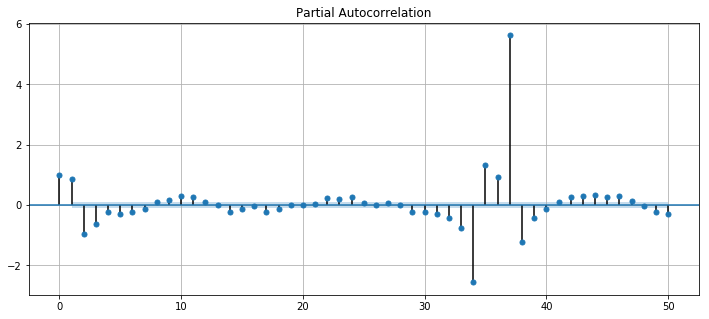

92


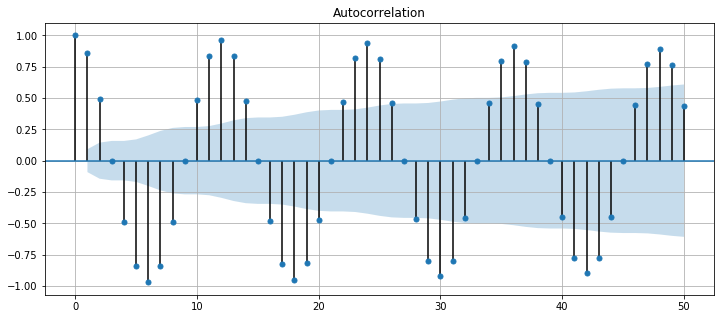

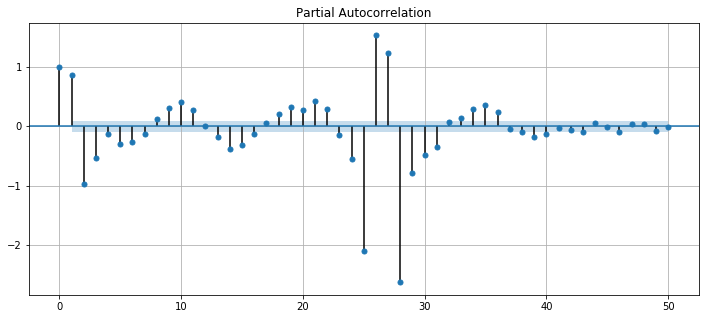

93


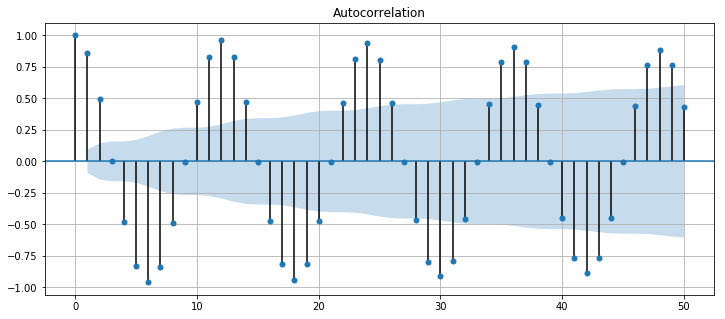

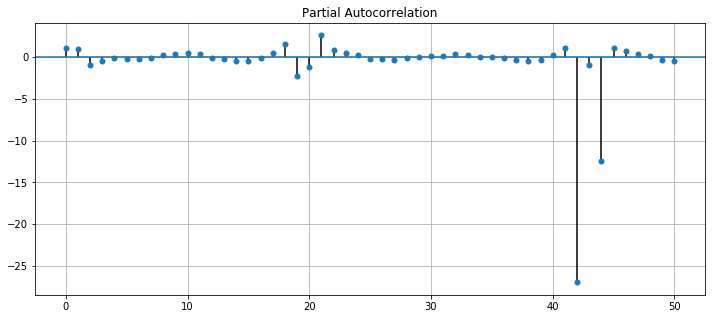

94


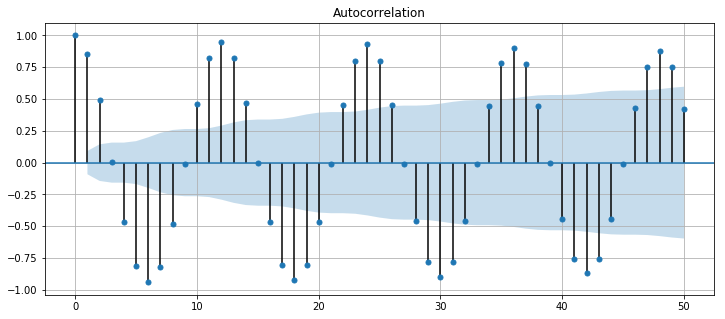

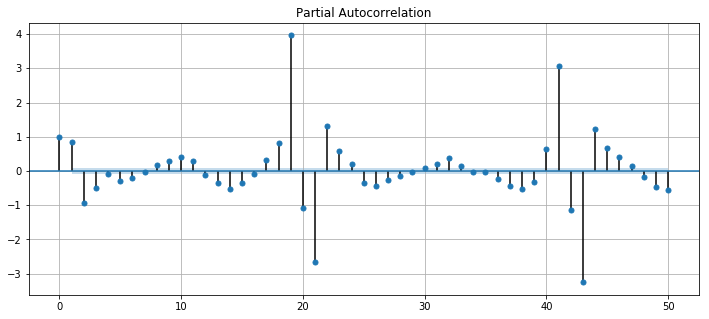

95


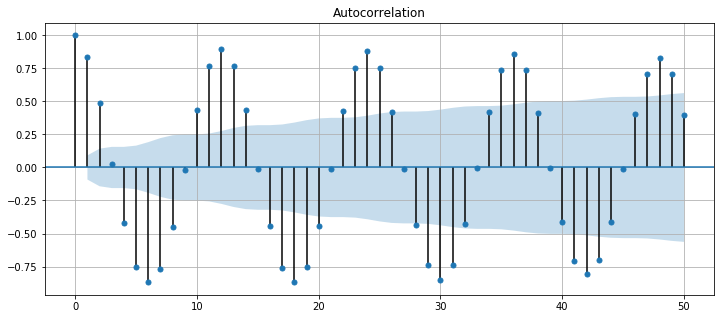

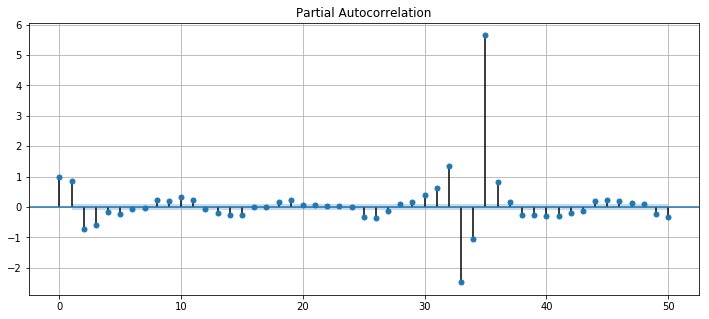

96


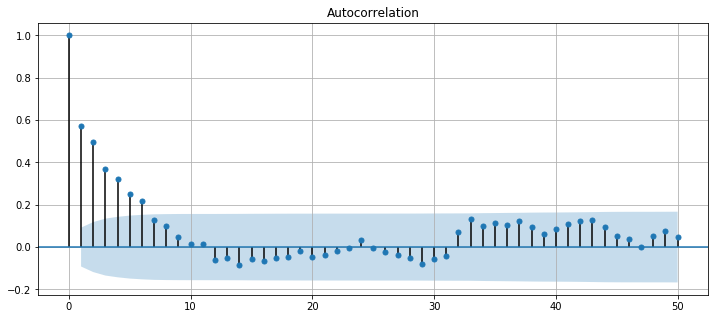

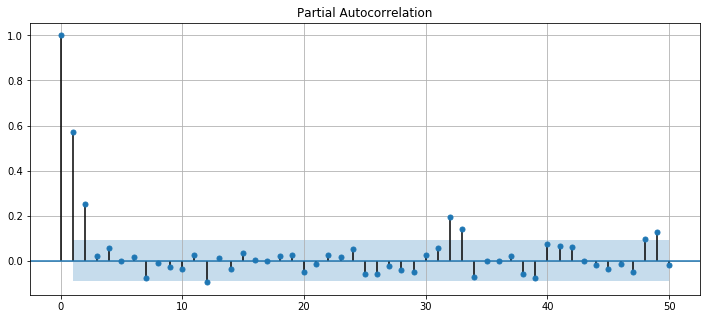

97


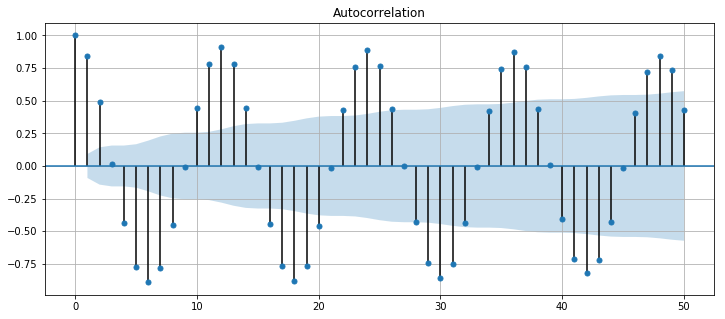

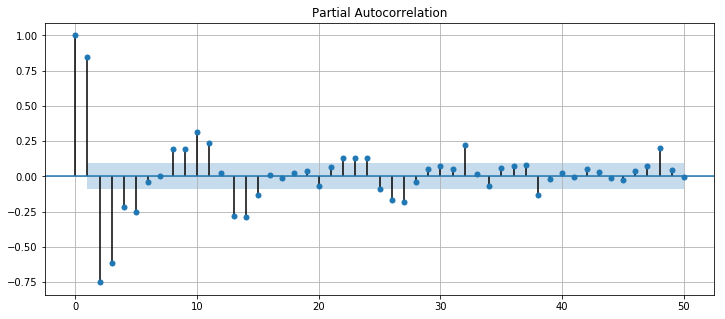

98


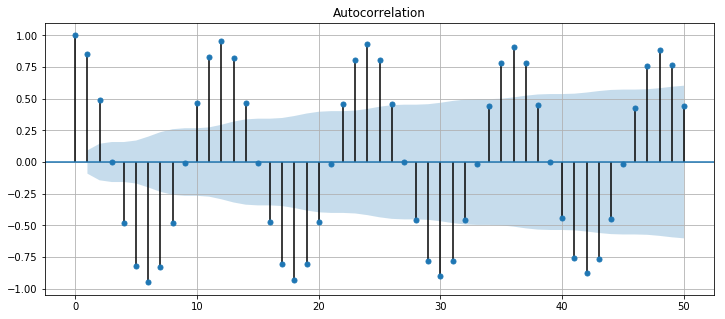

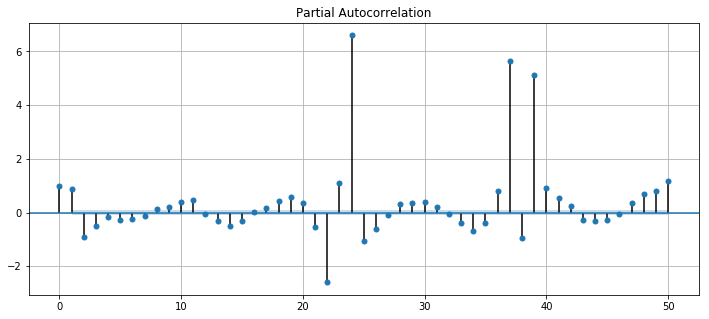

99


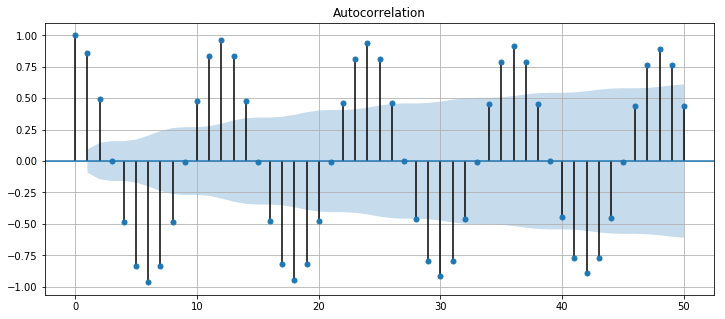

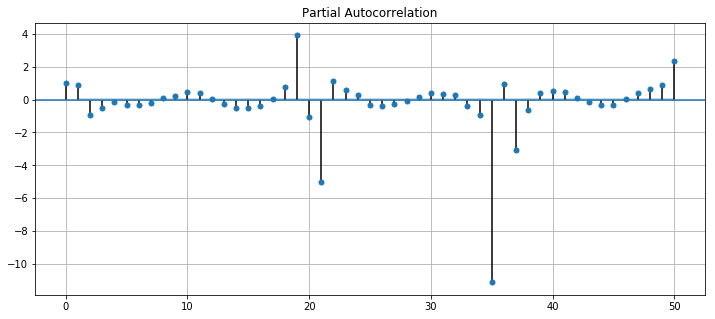

In [87]:
for i in range(30, 100):
    print(i)
    df2_diff = df2.diff(periods=i)


    fig, ax = plt.subplots(figsize=(12,5))
    plot_acf(df2_diff['LandAndOceanAverageTemperature'].dropna(),ax=ax, lags=50)
    plt.grid()
    plt.show()

    fig, ax = plt.subplots(figsize=(12, 5))
    plot_pacf(df2_diff['LandAndOceanAverageTemperature'].dropna(),ax=ax, lags=50)
    plt.grid()
    plt.show()